[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/jotabruno/CLIMATE_CHANGE_CMIP6/blob/main/1GCM_CMIP6_VARIABLES_SUPERFICIE.ipynb
)


In [1]:
!pip install -q intake intake-esm xarray netcdf4 zarr cartopy shapely pyproj fsspec==2025.3.0 numcodecs requests==2.32.4 aiohttp
!pip install xmip

import intake
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


import xmip
from xmip.preprocessing import combined_preprocessing
import gcsfs
import random
from cartopy.io import shapereader
from xmip.preprocessing import combined_preprocessing
import fsspec

fsspec.config.conf["gcs"] = {"token": "anon"}
plt.rcParams["figure.dpi"] = 120


^C



KeyboardInterrupt



In [1]:
import intake
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


import xmip
from xmip.preprocessing import combined_preprocessing
import gcsfs
import random
from cartopy.io import shapereader
from xmip.preprocessing import combined_preprocessing
import fsspec

fsspec.config.conf["gcs"] = {"token": "anon"}
plt.rcParams["figure.dpi"] = 120

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
cat = intake.open_esm_datastore(cat_url)
cat.df

activity_id       institution_id      source_id       experiment_id  \
0       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
1       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
2       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
3       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
4       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
...            ...                  ...            ...                 ...   
514813        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
514814        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
514815        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
514816        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
514817        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   

       member_id table_id variable_id grid_label  \
0       r1i1p1f1     Amon          ps         gn   
1       r1i1p1f1     Amon        rsds         gn   
2       r1i1p1f1     Amon        rlus         gn   
3       r1i1p1f1     Amon        rlds         gn   
4       r1i1p1f1     Amon         psl         gn   
...          ...      ...         ...        ...   
514813  r1i1p1f1     Amon         tas         gr   
514814  r1i1p1f1     Amon        tauu         gr   
514815  r1i1p1f1     Amon         hur         gr   
514816  r1i1p1f1     Amon         hus         gr   
514817  r1i1p1f1     Amon        tauv         gr   

                                                   zstore dcpp_init_year  \
0       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...           <NA>   
1       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...           <NA>   
2       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...           <NA>   
3       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...           <NA>   
4       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...           <NA>   
...                                                   ...            ...   
514813  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...           <NA>   
514814  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...           <NA>   
514815  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...           <NA>   
514816  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...           <NA>   
514817  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...           <NA>   

         version  
0       20170706  
1       20170706  
2       20170706  
3       20170706  
4       20170706  
...          ...  
514813  20211207  
514814  20211207  
514815  20211207  
514816  20211207  
514817  20211207  

[514818 rows x 11 columns]

In [3]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat2 = cat.search(
    variable_id = 'tas',        # temperatura superficial 
    table_id = 'Amon',          # datos mensuales del océano
    experiment_id = 'historical',  # simulación histórica
    
    source_id =['NorCPM1','GISS-E2-1-G','CESM2','BCC-CSM2-MR','NorESM2-LM','CESM2-FV2','MPI-ESM1-2-LR','GISS-E2-1-H','ACCESS-ESM1-5','MRI-ESM2-0'],

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
cat2.df

activity_id institution_id      source_id experiment_id member_id table_id  \
0        CMIP      NASA-GISS    GISS-E2-1-G    historical  r1i1p1f1     Amon   
1        CMIP            BCC    BCC-CSM2-MR    historical  r1i1p1f1     Amon   
2        CMIP            MRI     MRI-ESM2-0    historical  r1i1p1f1     Amon   
3        CMIP           NCAR          CESM2    historical  r1i1p1f1     Amon   
4        CMIP      NASA-GISS    GISS-E2-1-H    historical  r1i1p1f1     Amon   
5        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Amon   
6        CMIP            NCC     NorESM2-LM    historical  r1i1p1f1     Amon   
7        CMIP          CSIRO  ACCESS-ESM1-5    historical  r1i1p1f1     Amon   
8        CMIP           NCAR      CESM2-FV2    historical  r1i1p1f1     Amon   
9        CMIP            NCC        NorCPM1    historical  r1i1p1f1     Amon   

  variable_id grid_label                                             zstore  \
0         tas         gn  gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...   
1         tas         gn  gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...   
2         tas         gn  gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...   
3         tas         gn  gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...   
4         tas         gn  gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/hi...   
5         tas         gn  gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...   
6         tas         gn  gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historica...   
7         tas         gn  gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/hist...   
8         tas         gn  gs://cmip6/CMIP6/CMIP/NCAR/CESM2-FV2/historica...   
9         tas         gn  gs://cmip6/CMIP6/CMIP/NCC/NorCPM1/historical/r...   

  dcpp_init_year   version  
0           <NA>  20180827  
1           <NA>  20181126  
2           <NA>  20190222  
3           <NA>  20190308  
4           <NA>  20190403  
5           <NA>  20190710  
6           <NA>  20190815  
7           <NA>  20191115  
8           <NA>  20191120  
9           <NA>  20200724

In [4]:
# 2. Abrir todos los modelos (36)
# ==============================
ds_dict_full = cat2.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
import numpy as np

def time_range_str(t):
    # t es ds['time']
    t0 = t.isel(time=0).values
    t1 = t.isel(time=-1).values
    n  = t.size
    return t0, t1, n

print("Modelos y cobertura temporal (historical):\n")

for key, ds in ds_dict_full.items():
    src = ds.attrs.get("source_id", key.split(".")[2] if isinstance(key, str) and "." in key else str(key))

    if "time" not in ds.coords:
        print(f"{src}: SIN coord time")
        continue

    t = ds["time"]
    t0, t1, n = time_range_str(t)

    # paso temporal aproximado (en días), si existe
    dt = None
    if n >= 2:
        try:
            dt = (t.isel(time=1).values - t.isel(time=0).values) / np.timedelta64(1, "D")
        except Exception:
            dt = None

    if dt is None:
        print(f"{src}: {t0}  ->  {t1}   (n={n})")
    else:
        print(f"{src}: {t0}  ->  {t1}   (n={n}, dt≈{dt:.3g} días)")

Modelos y cobertura temporal (historical):

MPI-ESM1-2-LR: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
MRI-ESM2-0: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
ACCESS-ESM1-5: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
CESM2-FV2: 1850-01-15 12:00:00  ->  2014-12-15 12:00:00   (n=1980, dt≈29.5 días)
BCC-CSM2-MR: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
CESM2: 1850-01-15 12:00:00  ->  2014-12-15 12:00:00   (n=1980, dt≈29.5 días)
GISS-E2-1-G: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
NorCPM1: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
GISS-E2-1-H: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
NorESM2-LM: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)


In [6]:
for key, ds in ds_dict_full.items():
    print("="*80)
    print(key)
    print("source_id:", ds.attrs.get("source_id"))
    print("dims:", ds.dims)
    print("coords:", list(ds.coords))
    print("tas dims:", ds["tas"].dims)
    print("tas shape:", ds["tas"].shape)


CMIP.MPI-M.MPI-ESM1-2-LR.historical.Amon.gn
source_id: MPI-ESM1-2-LR
dims: FrozenMappingWarningOnValuesAccess({'lat': 96, 'bnds': 2, 'lon': 192, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'time', 'time_bnds', 'member_id', 'dcpp_init_year']
tas dims: ('member_id', 'dcpp_init_year', 'time', 'lat', 'lon')
tas shape: (1, 1, 1980, 96, 192)
CMIP.MRI.MRI-ESM2-0.historical.Amon.gn
source_id: MRI-ESM2-0
dims: FrozenMappingWarningOnValuesAccess({'lat': 160, 'bnds': 2, 'lon': 320, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'time', 'time_bnds', 'member_id', 'dcpp_init_year']
tas dims: ('member_id', 'dcpp_init_year', 'time', 'lat', 'lon')
tas shape: (1, 1, 1980, 160, 320)
CMIP.CSIRO.ACCESS-ESM1-5.historical.Amon.gn
source_id: ACCESS-ESM1-5
dims: FrozenMappingWarningOnValuesAccess({'lat': 145, 'bnds': 2, 'lon': 192, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
co

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader

def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

# ==============================
# Ajusta aquí
# ==============================
country = "Peru"      # "Chile", "Argentina", etc.
pad_deg = 2.0         # margen alrededor del país
dpi_out = 300
out_png = "tas_10modelos_%s_1981_2014_contornos.png" % country

proj = ccrs.PlateCarree()

# extent + geometría del país (para centrar automáticamente)
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")
lon_min, lon_max, lat_min, lat_max = extent

In [8]:
# ==============================
# Filtrar SOLO modelos con lon/lat (grilla regular lat-lon 1D)
# ==============================
import random

def ensure_lonlat_names(ds):
    rename = {}
    if "longitude" in ds.coords and "lon" not in ds.coords:
        rename["longitude"] = "lon"
    if "latitude" in ds.coords and "lat" not in ds.coords:
        rename["latitude"] = "lat"
    if rename:
        ds = ds.rename(rename)
    return ds

ds_dict_lonlat = {}

for key, ds in ds_dict_full.items():
    ds = ensure_lonlat_names(ds)

    if "tas" not in ds:
        continue

    tas = ds["tas"]

    # 1) lon/lat existen como coords
    if ("lon" not in tas.coords) or ("lat" not in tas.coords):
        continue

    # 2) lon/lat son dimensiones (evita grillas curvilíneas tipo y,x)
    if not {"lon", "lat"}.issubset(tas.dims):
        continue

    ds_dict_lonlat[key] = ds

print(f"Modelos con lon/lat (1D) = {len(ds_dict_lonlat)}")

# ==============================
# Elegir 10 al azar SOLO de esos
# ==============================
random.seed(42)

items = list(ds_dict_lonlat.items())
if len(items) < 10:
    raise ValueError(f"Solo hay {len(items)} modelos con lon/lat; no se puede muestrear 10.")

selected_items = random.sample(items, 10)
ds_dict = dict(selected_items)   # <- este es tu dict final (10 modelos) para plotear


Modelos con lon/lat (1D) = 10


## PLOT SUDAMERICA ##


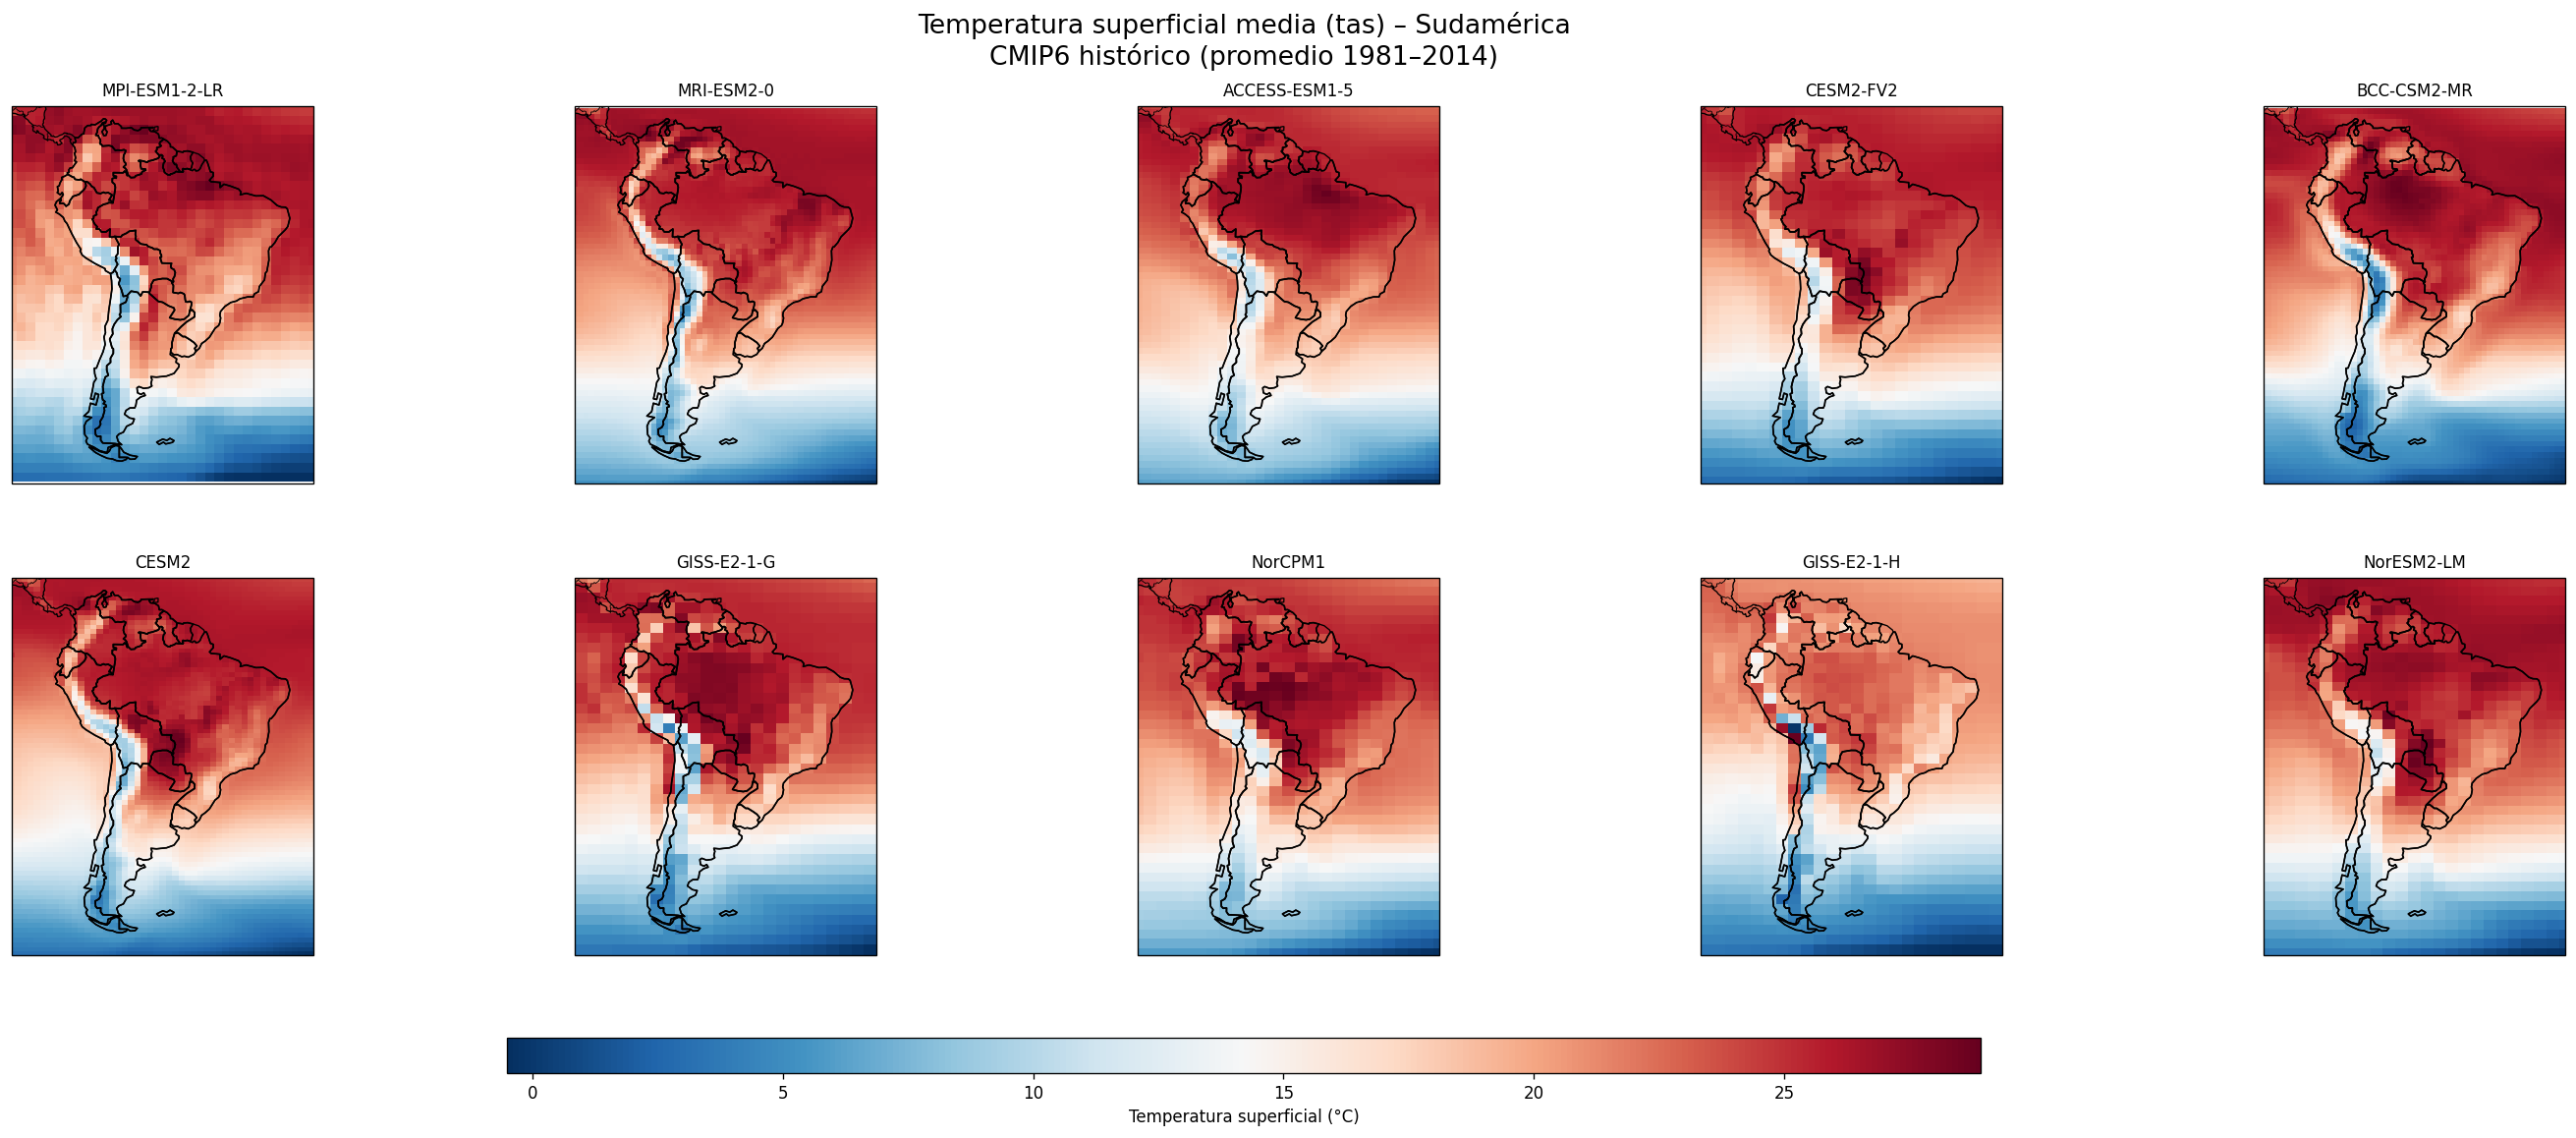

In [9]:
# ==============================
# Dominio Sudamérica
# ==============================
lon_min, lon_max = -90, -30
lat_min, lat_max = -60, 15

# ==============================
# Figura 2×5 con proyección
# ==============================
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

proj = ccrs.PlateCarree()
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
axes = axes.flatten()

# ==============================
# Contorno Sudamérica (Natural Earth)
# ==============================
sa_shp = shapereader.natural_earth(
    resolution="110m", category="cultural", name="admin_0_countries"
)
sa_records = shapereader.Reader(sa_shp).records()
sa_geoms = [r.geometry for r in sa_records if r.attributes.get("CONTINENT") == "South America"]

# ==============================
# Periodo a promediar
# ==============================
t0 = "1981-01-01"
t1 = "2014-12-31"

im = None

# ==============================
# Loop de mapas (promedio 1981–2014)
# ==============================
for ax, (key, ds) in zip(axes, ds_dict_full.items()):

    src = ds.attrs.get("source_id", "unknown")

    tas = ds["tas"].squeeze()

    # ordenar + recorte temporal 1981–2014
    if "time" in tas.dims:
        tas = tas.sortby("time")
        tas = tas.sel(time=slice(t0, t1))
        if tas.time.size == 0:
            ax.set_axis_off()
            continue

    # promedio en el periodo (°C)
    tas = tas.mean(dim="time", skipna=True) - 273.15

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    # recorte espacial
    tas_sa = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    # plot
    im = ax.pcolormesh(
        tas_sa.lon, tas_sa.lat, tas_sa,
        cmap="RdBu_r", shading="auto",
        transform=proj
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
    ax.coastlines(resolution="110m", linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_geometries(sa_geoms, crs=proj, facecolor="none", edgecolor="black", linewidth=1.0)

    ax.set_title(src, fontsize=10)

# ==============================
# Layout + colorbar + guardado
# ==============================
fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Temperatura superficial (°C)")

fig.suptitle(
    "Temperatura superficial media (tas) – Sudamérica\nCMIP6 histórico (promedio 1981–2014)",
    fontsize=16
)

out = "tas_Sudamerica_1981_2014_10modelos_CMIP6.png"
fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


## PLOT PAISES ##

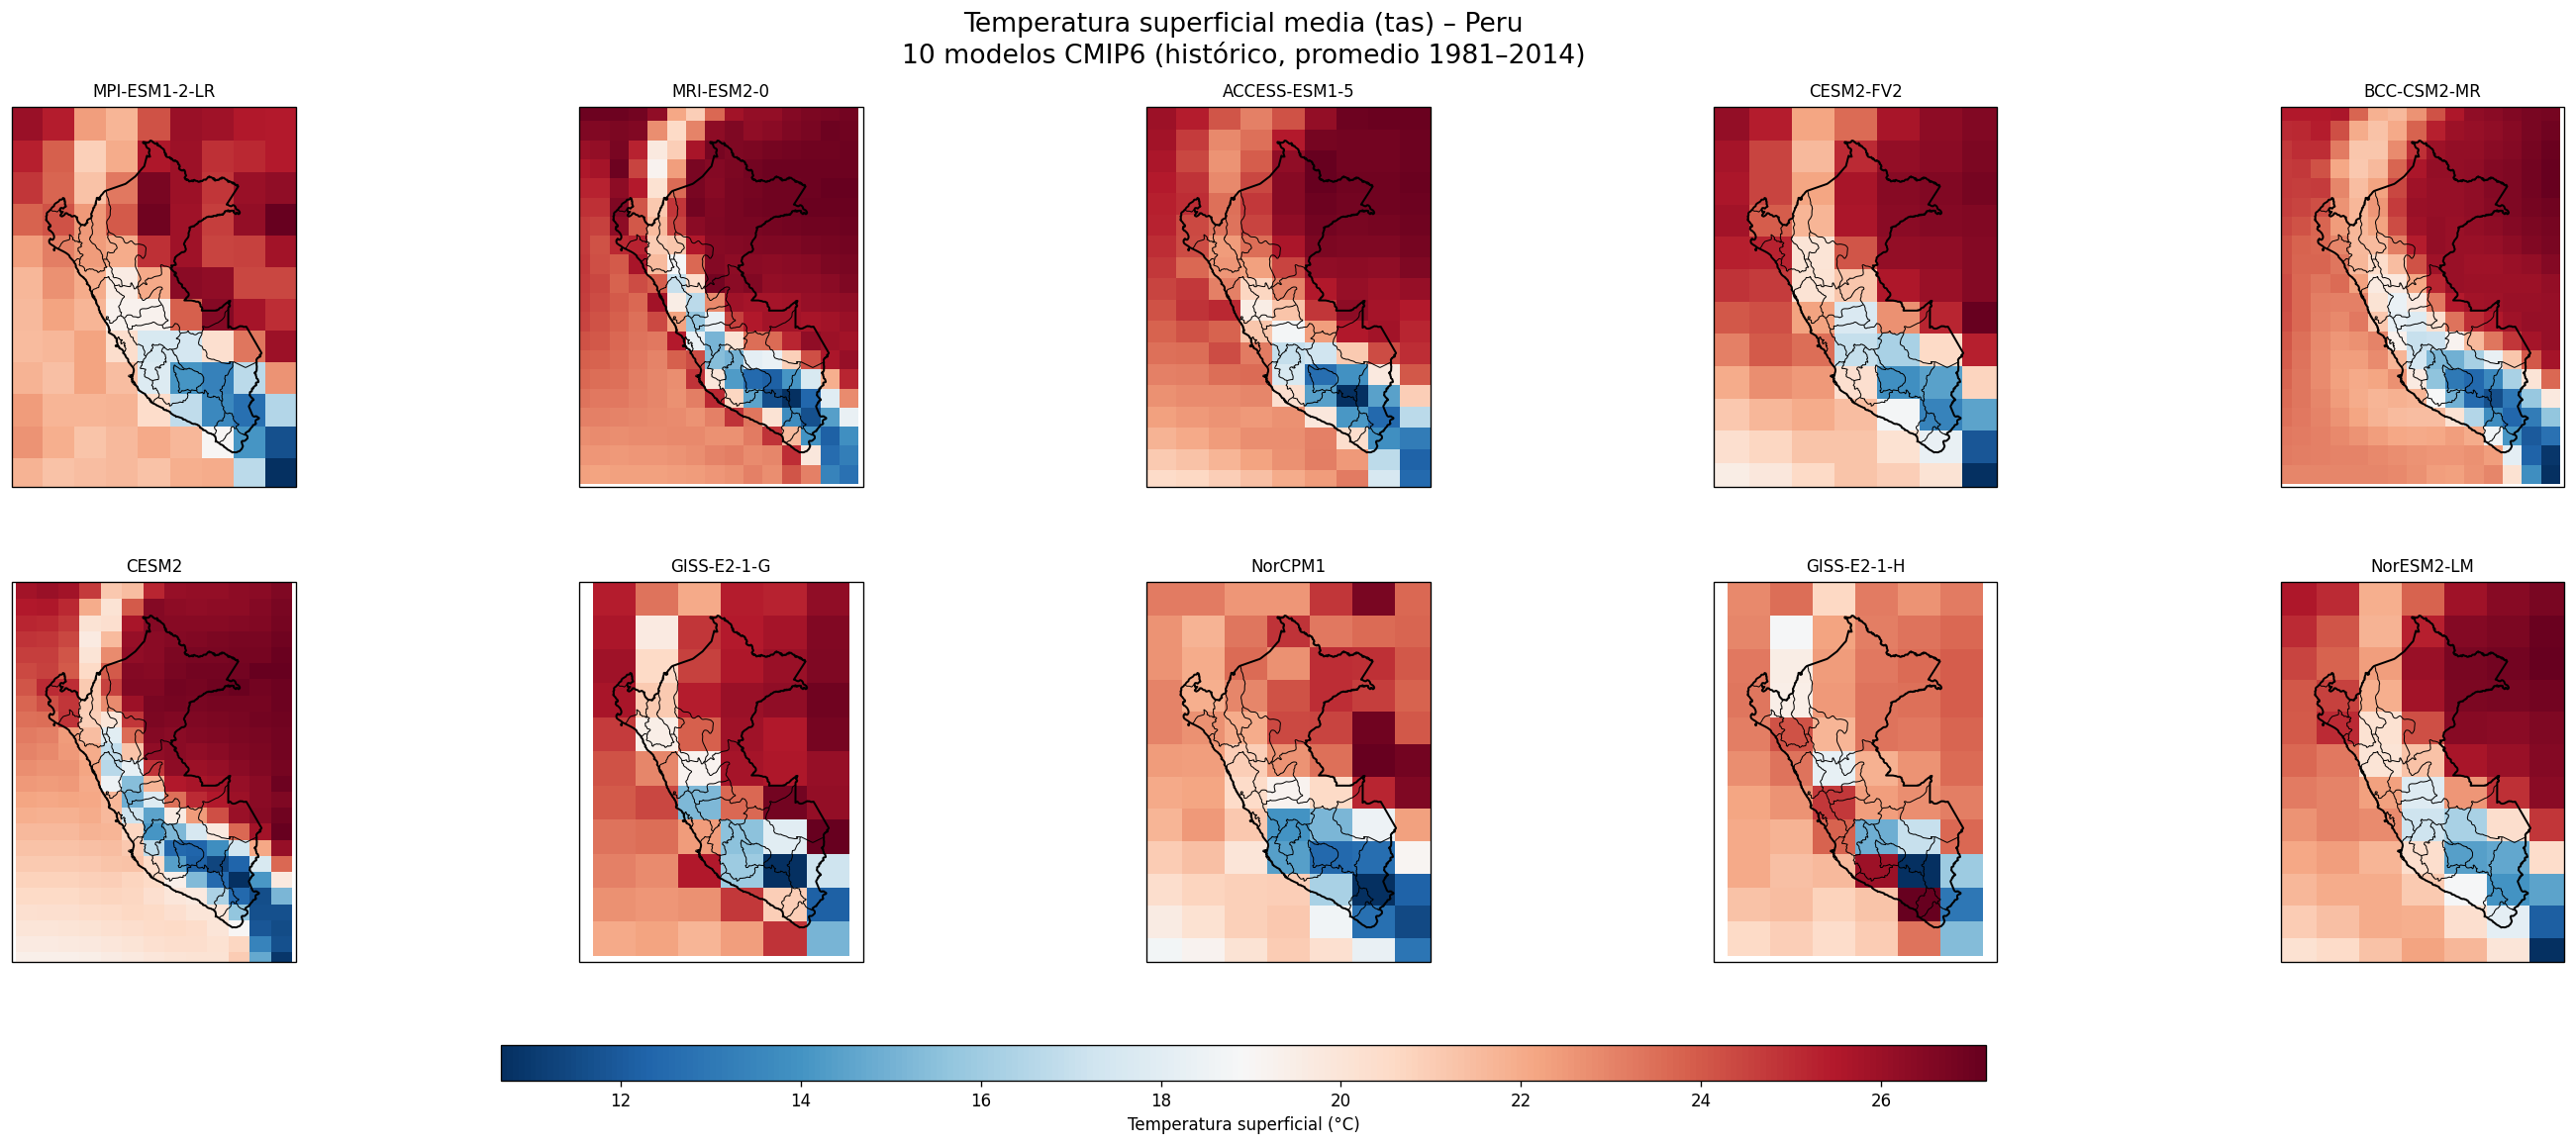

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader

def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

# ==============================
# Ajusta aquí
# ==============================
country = "Peru"      # "Chile", "Argentina", etc.
pad_deg = 2.0         # margen alrededor del país
dpi_out = 300
out_png = "tas_10modelos_%s_1981_2014_contornos.png" % country

proj = ccrs.PlateCarree()

# extent + geometría del país (para centrar automáticamente)
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")
lon_min, lon_max, lat_min, lat_max = extent

# admin_1 (líneas internas)
adm1_shp = shapereader.natural_earth(
    resolution="10m", category="cultural", name="admin_1_states_provinces_lines"
)
adm1_geoms = []
for r in shapereader.Reader(adm1_shp).records():
    a = r.attributes
    if (a.get("adm0_name") == country) or (a.get("ADM0_NAME") == country) or \
       (a.get("adm0_a3") == "PER") or (a.get("ADM0_A3") == "PER"):
        adm1_geoms.append(r.geometry)

# ==============================
# Periodo a promediar
# ==============================
t0 = "1981-01-01"
t1 = "2014-12-31"

# ==============================
# Figura 2 × 5
# ==============================
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
axes = axes.flatten()

im = None

for ax, (key, ds) in zip(axes, ds_dict_full.items()):

    src = ds.attrs.get("source_id", "unknown")

    tas = ds["tas"].squeeze()

    # ordenar + recorte temporal 1981–2014
    if "time" in tas.dims:
        tas = tas.sortby("time")
        tas = tas.sel(time=slice(t0, t1))
        if tas.time.size == 0:
            ax.set_axis_off()
            continue

    # promedio en el periodo (°C)
    tas = tas.mean(dim="time", skipna=True) - 273.15

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    # recorte según país (extent automático)
    tas_pe = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    im = ax.pcolormesh(
        tas_pe.lon, tas_pe.lat, tas_pe,
        cmap="RdBu_r", shading="auto",
        transform=proj
    )

    ax.set_extent(extent, crs=proj)

    # contorno país
    ax.add_geometries(
        country_geoms, crs=proj,
        facecolor="none", edgecolor="black",
        linewidth=1.2, zorder=3
    )

    # líneas internas admin_1
    if adm1_geoms:
        ax.add_geometries(
            adm1_geoms, crs=proj,
            facecolor="none", edgecolor="black",
            linewidth=0.6, zorder=3
        )

    ax.set_title(src, fontsize=10)

# Layout
fig.subplots_adjust(
    left=0.05, right=0.98, top=0.90, bottom=0.18,
    wspace=0.15, hspace=0.25
)

# Colorbar inferior
cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Temperatura superficial (°C)")

# Título general
fig.suptitle(
    f"Temperatura superficial media (tas) – {country}\n10 modelos CMIP6 (histórico, promedio 1981–2014)",
    fontsize=16
)

# Guardar
fig.savefig(out_png, dpi=dpi_out, bbox_inches="tight", facecolor="white")

plt.show()


## CAMBIO DE TEMPERATURA SSP585 SSP245 ##

In [13]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat3 = cat.search(
    variable_id = 'tas',        # temperatura  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'ssp585',  # simulación ssp585
    source_id = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_ssp585 = cat3.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects inste

In [14]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat4 = cat.search(
    variable_id = 'tas',        # temperatura  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'ssp245',  # simulación ssp585
    source_id = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
#  Abrir todos los modelos 
# ==============================
ds_dict_full_ssp245 = cat4.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [15]:
import numpy as np

def time_range_str(t):
    # t es ds['time']
    t0 = t.isel(time=0).values
    t1 = t.isel(time=-1).values
    n  = t.size
    return t0, t1, n

print("Modelos y cobertura temporal (ssp585):\n")

for key, ds in ds_dict_full_ssp585.items():
    src = ds.attrs.get("source_id", key.split(".")[2] if isinstance(key, str) and "." in key else str(key))

    if "time" not in ds.coords:
        print(f"{src}: SIN coord time")
        continue

    t = ds["time"]
    t0, t1, n = time_range_str(t)

    # paso temporal aproximado (en días), si existe
    dt = None
    if n >= 2:
        try:
            dt = (t.isel(time=1).values - t.isel(time=0).values) / np.timedelta64(1, "D")
        except Exception:
            dt = None

    if dt is None:
        print(f"{src}: {t0}  ->  {t1}   (n={n})")
    else:
        print(f"{src}: {t0}  ->  {t1}   (n={n}, dt≈{dt:.3g} días)")


Modelos y cobertura temporal (ssp585):

MRI-ESM2-0: 2015-01-16T12:00:00.000000000  ->  2100-12-16T12:00:00.000000000   (n=1032, dt≈29.5 días)
NorESM2-LM: 2015-01-16 12:00:00  ->  2100-12-16 12:00:00   (n=1032, dt≈29.5 días)
CESM2-WACCM: 2015-01-15 12:00:00  ->  2100-12-15 12:00:00   (n=1032, dt≈29.5 días)
AWI-CM-1-1-MR: 2015-01-16T12:00:00.000000000  ->  2100-12-16T12:00:00.000000000   (n=1032, dt≈29.5 días)
BCC-CSM2-MR: 2015-01-16 12:00:00  ->  2100-12-16 12:00:00   (n=1032, dt≈29.5 días)
MIROC6: 2015-01-16T12:00:00.000000000  ->  2100-12-16T12:00:00.000000000   (n=1032, dt≈29.5 días)
ACCESS-CM2: 2015-01-16 12:00:00  ->  2300-12-16 12:00:00   (n=3432, dt≈29.5 días)
MPI-ESM1-2-LR: 2035-01-16T12:00:00.000000000  ->  2034-12-16T12:00:00.000000000   (n=1032, dt≈29.5 días)
CanESM5: 2015-01-16 12:00:00  ->  2300-12-16 12:00:00   (n=3432, dt≈29.5 días)
CMCC-ESM2: 2015-01-16 12:00:00  ->  2100-12-16 12:00:00   (n=1032, dt≈29.5 días)


In [16]:
cat2 = cat.search(
    variable_id = 'tas',        # temperatura  
    table_id = 'Amon',          # datos mensuales d
    experiment_id = 'historical',  # simulación ssp585
    source_id = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo
    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_historical = cat2.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

# =========================================================
country = "Peru"          # <- cambia aquí (ej: "Chile", "Argentina")
pad_deg = 1.5             # margen alrededor del país
models = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
          'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5']

t0_hist, t1_hist = "1981-01-01", "2014-12-31"
t0_fut,  t1_fut  = "2036-01-01", "2050-12-31"

proj = ccrs.PlateCarree()


# UTILIDADES
# =========================================================
def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

def to_model_dict(ds_dict):
    out = {}
    for _, ds in ds_dict.items():
        m = ds.attrs.get("source_id", None)
        if m is not None:
            out[m] = ds
    return out

def sel_time_safe(da, t0, t1):
    da = da.sortby("time")
    try:
        return da.sel(time=slice(t0, t1))
    except Exception:
        y0, y1 = int(t0[:4]), int(t1[:4])
        return da.where((da["time"].dt.year >= y0) & (da["time"].dt.year <= y1), drop=True)

def mean_tas_period(ds, t0, t1, extent):
    tas = ds["tas"].squeeze()

    if "time" in tas.dims:
        tas = sel_time_safe(tas, t0, t1)
        if tas.sizes.get("time", 0) == 0:
            return None

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    lon_min, lon_max, lat_min, lat_max = extent
    tas = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    if tas.lon.size == 0 or tas.lat.size == 0:
        return None

    return tas.mean("time", skipna=True) - 273.15  # °C


# =========================================================
# EXTENT PERÚ (o el país que elijas)
# =========================================================
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")

# =========================================================
# DICCIONARIOS POR MODELO (asume que ya existen)
# ds_dict_full_historical, ds_dict_full_ssp585
# =========================================================
hist_by_model = to_model_dict(ds_dict_full_historical)
fut_by_model  = to_model_dict(ds_dict_full_ssp585)

# =========================================================
# DELTA POR MODELO: (2036–2050) - (1981–2014)
# =========================================================
delta_maps = {}
max_abs = 0.0

for m in models:
    ds_h = hist_by_model.get(m)
    ds_f = fut_by_model.get(m)

    if (ds_h is None) or (ds_f is None):
        delta_maps[m] = None
        continue

    hist = mean_tas_period(ds_h, t0_hist, t1_hist, extent)
    fut  = mean_tas_period(ds_f, t0_fut,  t1_fut,  extent)

    if (hist is None) or (fut is None):
        delta_maps[m] = None
        continue

    delta = fut - hist
    delta_maps[m] = delta

    try:
        max_abs = max(max_abs, float(np.nanmax(np.abs(delta.values))))
    except Exception:
        max_abs = max(max_abs, float(np.nanmax(np.abs(delta.load().values))))

if max_abs == 0:
    max_abs = 1.0


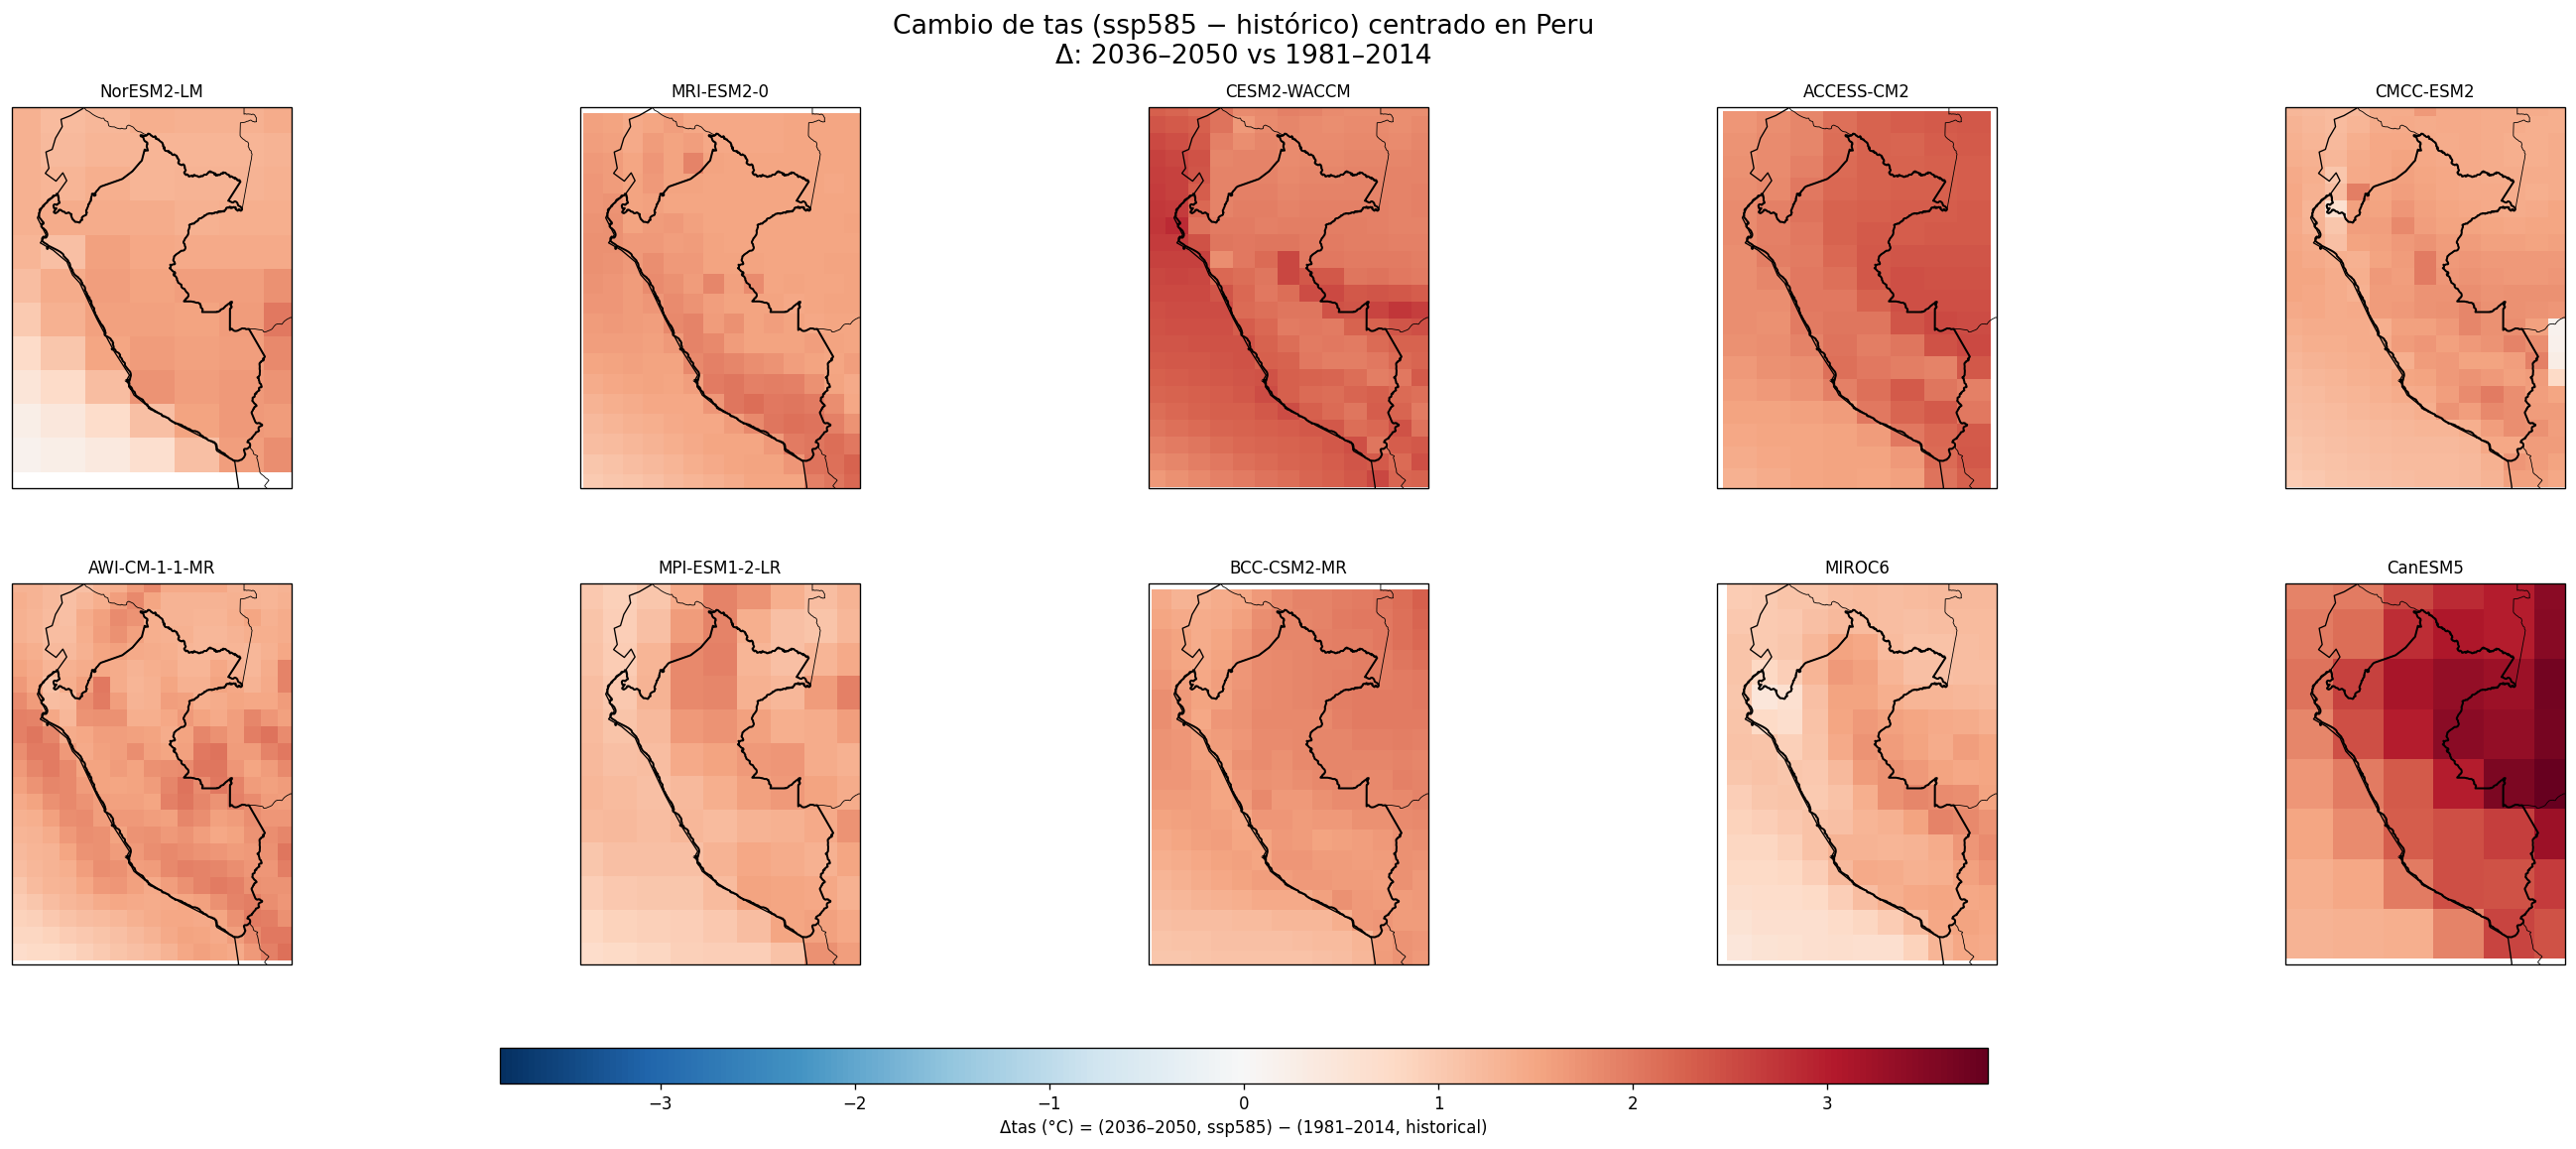

In [18]:
# PLOT 2×5 centrado en el país
# =========================================================
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
axes = axes.flatten()

im = None
for ax, m in zip(axes, models):

    ax.set_extent(extent, crs=proj)

    delta = delta_maps.get(m)
    if delta is None:
        ax.set_title(f"{m}\n(sin datos)", fontsize=10)
        ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                          edgecolor="black", linewidth=1.2, zorder=3)
        ax.coastlines(resolution="110m", linewidth=0.8)
        continue

    im = ax.pcolormesh(
        delta["lon"], delta["lat"], delta,
        shading="auto", cmap="RdBu_r",
        vmin=-max_abs, vmax=max_abs,
        transform=proj
    )

    ax.coastlines(resolution="110m", linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                      edgecolor="black", linewidth=1.2, zorder=3)

    ax.set_title(m, fontsize=10)

fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Δtas (°C) = (2036–2050, ssp585) − (1981–2014, historical)")

fig.suptitle(
    f"Cambio de tas (ssp585 − histórico) centrado en {country}\nΔ: 2036–2050 vs 1981–2014",
    fontsize=16
)

out = f"delta_tas_{country}_ssp585_2036_2050_minus_hist_1981_2014.png"
fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

plt.show()

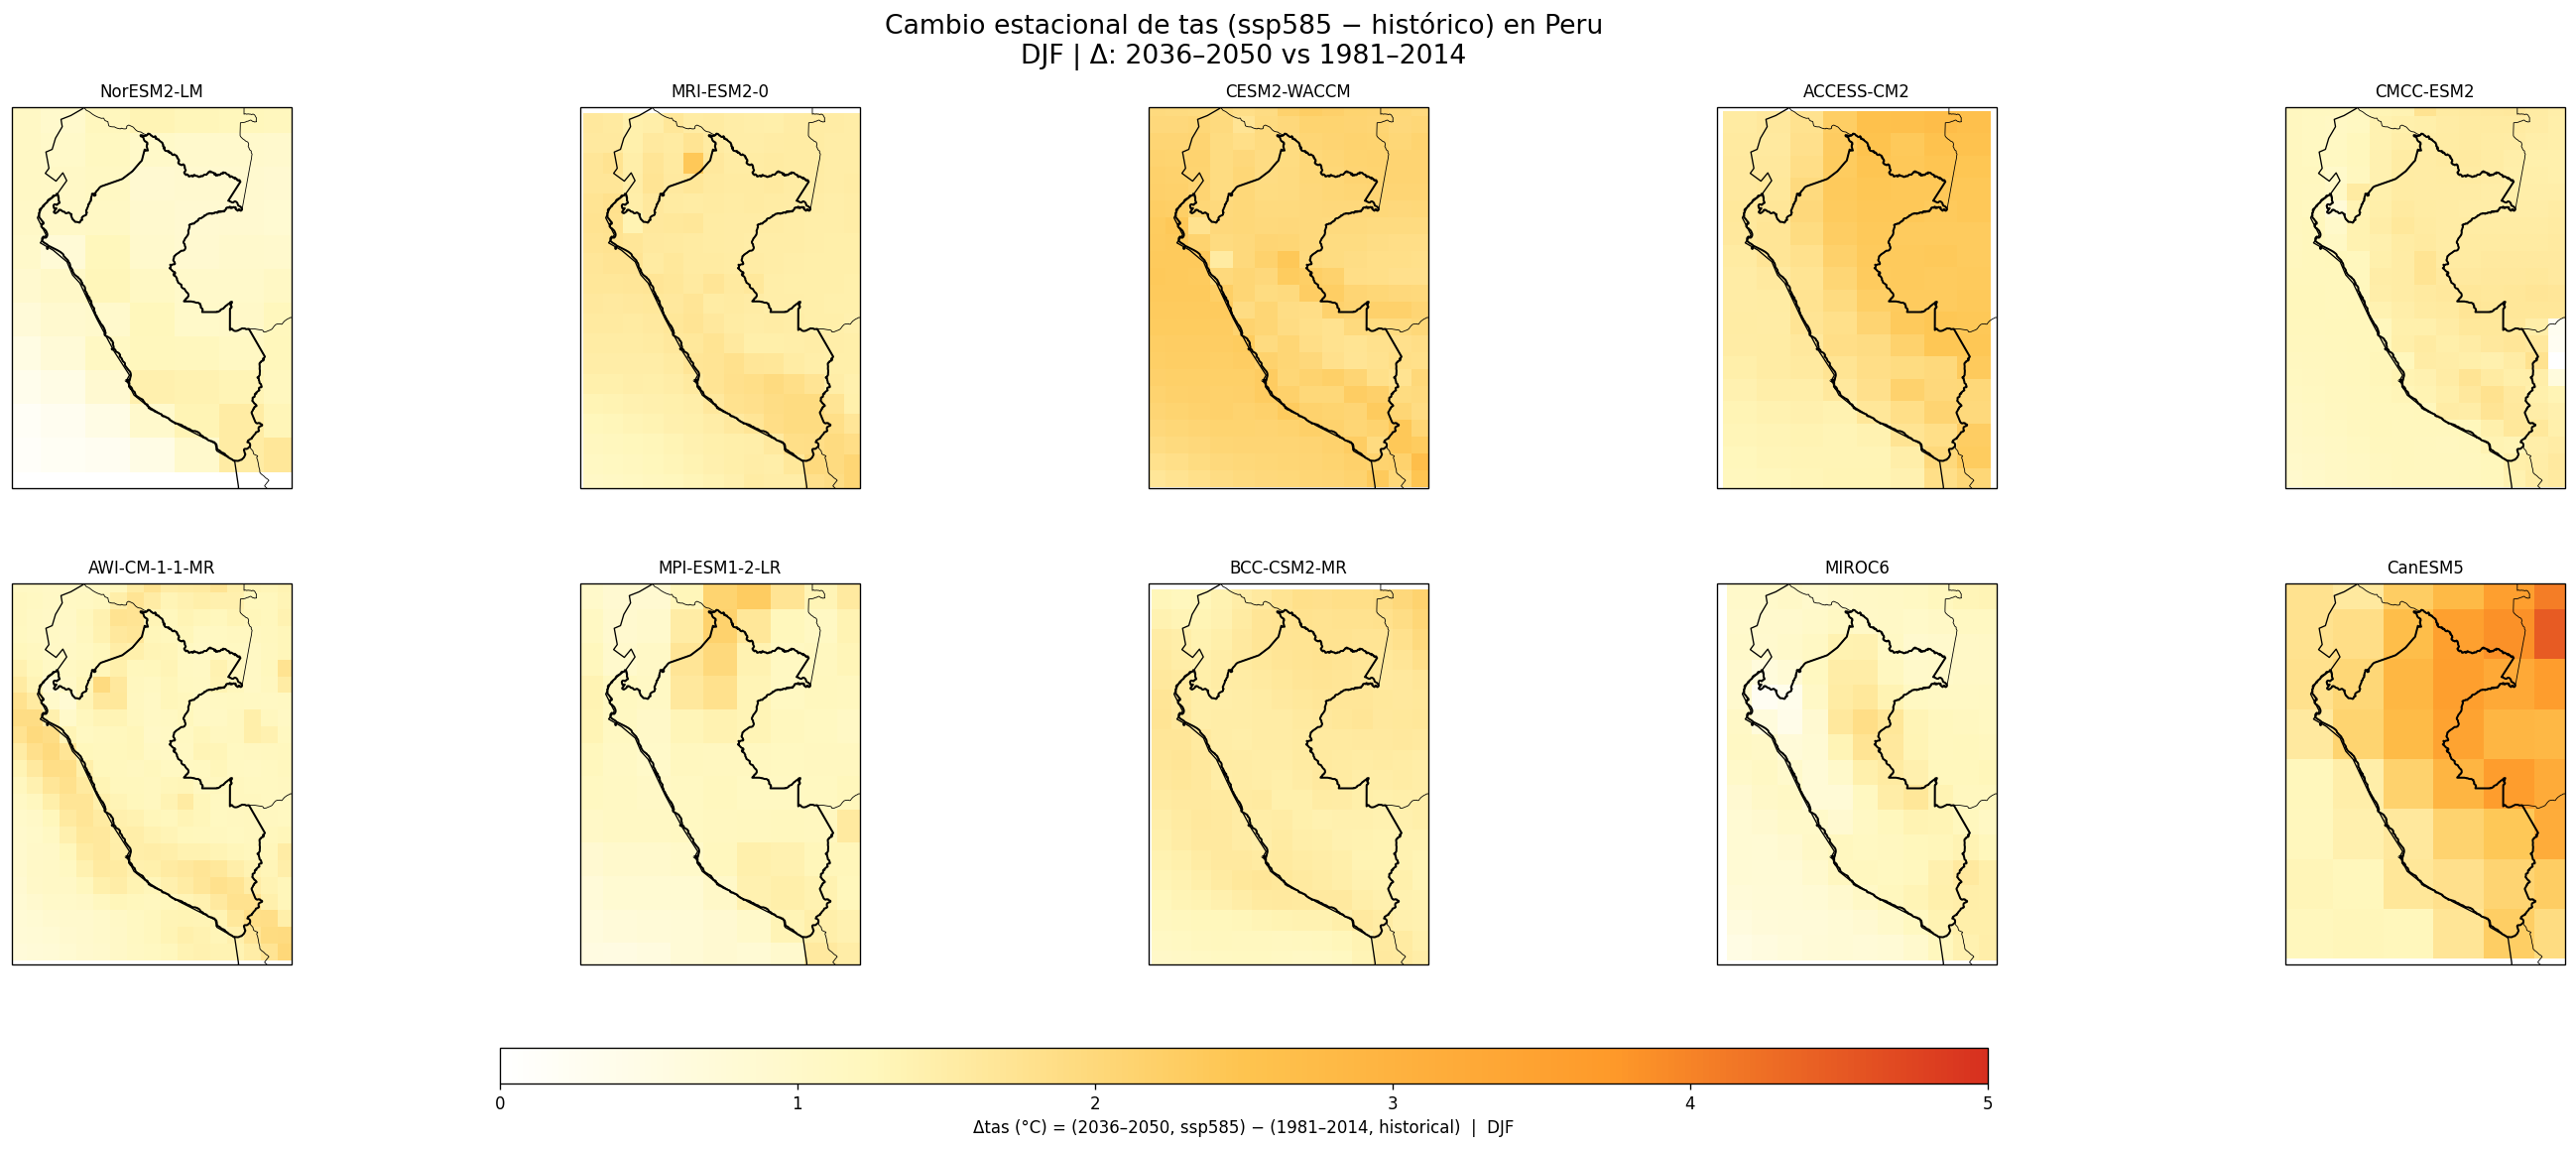

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from matplotlib.colors import LinearSegmentedColormap

# =========================================================
# AJUSTA AQUÍ
# =========================================================
country = "Peru"
pad_deg = 1.5
models = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
          'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5']

t0_hist, t1_hist = "1981-01-01", "2014-12-31"
t0_fut,  t1_fut  = "2036-01-01", "2050-12-31"

proj = ccrs.PlateCarree()

# =========================================================
# UTILIDADES
# =========================================================
def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

def to_model_dict(ds_dict):
    out = {}
    for _, ds in ds_dict.items():
        m = ds.attrs.get("source_id", None)
        if m is not None:
            out[m] = ds
    return out

def sel_time_safe(da, t0, t1):
    da = da.sortby("time")
    try:
        return da.sel(time=slice(t0, t1))
    except Exception:
        y0, y1 = int(t0[:4]), int(t1[:4])
        return da.where((da["time"].dt.year >= y0) & (da["time"].dt.year <= y1), drop=True)

def mean_tas_period_season(ds, t0, t1, extent, season):
    tas = ds["tas"].squeeze()

    if "time" in tas.dims:
        tas = sel_time_safe(tas, t0, t1)
        if tas.sizes.get("time", 0) == 0:
            return None

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    lon_min, lon_max, lat_min, lat_max = extent
    tas = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    if tas.lon.size == 0 or tas.lat.size == 0:
        return None

    # climatología estacional del periodo
    tas_seas = tas.groupby("time.season").mean("time", skipna=True).sel(season=season)

    return tas_seas - 273.15  # °C

# =========================================================
# EXTENT + GEOM DEL PAÍS
# =========================================================
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")

# =========================================================
# DICCIONARIOS POR MODELO (asume que ya existen)
# ds_dict_full_historical, ds_dict_full_ssp585
# =========================================================
hist_by_model = to_model_dict(ds_dict_full_historical)
fut_by_model  = to_model_dict(ds_dict_full_ssp585)

# =========================================================
# COLORMAP: blanco -> amarillo -> naranja -> rojo (0 a 5 °C)
# =========================================================
cmap_pos = LinearSegmentedColormap.from_list(
    "white_yellow_orange_red",
    ["#ffffff", "#fff7bc", "#fec44f", "#fe9929", "#d7301f"]
)

vmin, vmax = 0.0, 5.0

# =========================================================
# CAMBIO ESTACIONAL: (2036–2050) - (1981–2014)
# =========================================================
seasons = ["DJF", "MAM", "JJA", "SON"]

for season in seasons:

    # delta por modelo para esta estación
    delta_maps = {}

    for m in models:
        ds_h = hist_by_model.get(m)
        ds_f = fut_by_model.get(m)

        if (ds_h is None) or (ds_f is None):
            delta_maps[m] = None
            continue

        hist = mean_tas_period_season(ds_h, t0_hist, t1_hist, extent, season)
        fut  = mean_tas_period_season(ds_f, t0_fut,  t1_fut,  extent, season)

        if (hist is None) or (fut is None):
            delta_maps[m] = None
            continue

        delta = fut - hist

        # como quieres solo positivo, recorta a [0, 6]
        delta = delta.clip(min=vmin, max=vmax)

        delta_maps[m] = delta

    # =========================================================
    # PLOT 2×5 por estación
    # =========================================================
    fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
    axes = axes.flatten()

    im = None
    for ax, m in zip(axes, models):

        ax.set_extent(extent, crs=proj)

        delta = delta_maps.get(m)
        if delta is None:
            ax.set_title(f"{m}\n(sin datos)", fontsize=10)
            ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                              edgecolor="black", linewidth=1.2, zorder=3)
            ax.coastlines(resolution="110m", linewidth=0.8)
            continue

        im = ax.pcolormesh(
            delta["lon"], delta["lat"], delta,
            shading="auto",
            cmap=cmap_pos,
            vmin=vmin, vmax=vmax,
            transform=proj
        )

        ax.coastlines(resolution="110m", linewidth=0.8)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                          edgecolor="black", linewidth=1.2, zorder=3)
        ax.set_title(m, fontsize=10)

    fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

    cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
    cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
    cbar.set_label(f"Δtas (°C) = (2036–2050, ssp585) − (1981–2014, historical)  |  {season}")

    fig.suptitle(
        f"Cambio estacional de tas (ssp585 − histórico) en {country}\n{season} | Δ: 2036–2050 vs 1981–2014",
        fontsize=16
    )

    out = f"delta_tas_{country}_{season}_ssp585_hist_6.png"
    fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

    plt.show()


## SSP245 ##

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

# =========================================================
country = "Peru"          # <- cambia aquí (ej: "Chile", "Argentina")
pad_deg = 1.5             # margen alrededor del país
models = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
          'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5']

t0_hist, t1_hist = "1981-01-01", "2014-12-31"
t0_fut,  t1_fut  = "2036-01-01", "2050-12-31"

proj = ccrs.PlateCarree()


# UTILIDADES
# =========================================================
def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

def to_model_dict(ds_dict):
    out = {}
    for _, ds in ds_dict.items():
        m = ds.attrs.get("source_id", None)
        if m is not None:
            out[m] = ds
    return out

def sel_time_safe(da, t0, t1):
    da = da.sortby("time")
    try:
        return da.sel(time=slice(t0, t1))
    except Exception:
        y0, y1 = int(t0[:4]), int(t1[:4])
        return da.where((da["time"].dt.year >= y0) & (da["time"].dt.year <= y1), drop=True)

def mean_tas_period(ds, t0, t1, extent):
    tas = ds["tas"].squeeze()

    if "time" in tas.dims:
        tas = sel_time_safe(tas, t0, t1)
        if tas.sizes.get("time", 0) == 0:
            return None

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    lon_min, lon_max, lat_min, lat_max = extent
    tas = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    if tas.lon.size == 0 or tas.lat.size == 0:
        return None

    return tas.mean("time", skipna=True) - 273.15  # °C


# =========================================================
# EXTENT PERÚ (o el país que elijas)
# =========================================================
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")

# =========================================================
# DICCIONARIOS POR MODELO (asume que ya existen)
# ds_dict_full_historical, ds_dict_full_ssp245


# =========================================================
hist_by_model = to_model_dict(ds_dict_full_historical)
fut_by_model  = to_model_dict(ds_dict_full_ssp245)

# =========================================================
# DELTA POR MODELO: (2036–2050) - (1981–2014)
# =========================================================
delta_maps = {}
max_abs = 0.0

for m in models:
    ds_h = hist_by_model.get(m)
    ds_f = fut_by_model.get(m)

    if (ds_h is None) or (ds_f is None):
        delta_maps[m] = None
        continue

    hist = mean_tas_period(ds_h, t0_hist, t1_hist, extent)
    fut  = mean_tas_period(ds_f, t0_fut,  t1_fut,  extent)

    if (hist is None) or (fut is None):
        delta_maps[m] = None
        continue

    delta = fut - hist
    delta_maps[m] = delta

    try:
        max_abs = max(max_abs, float(np.nanmax(np.abs(delta.values))))
    except Exception:
        max_abs = max(max_abs, float(np.nanmax(np.abs(delta.load().values))))

if max_abs == 0:
    max_abs = 1.0



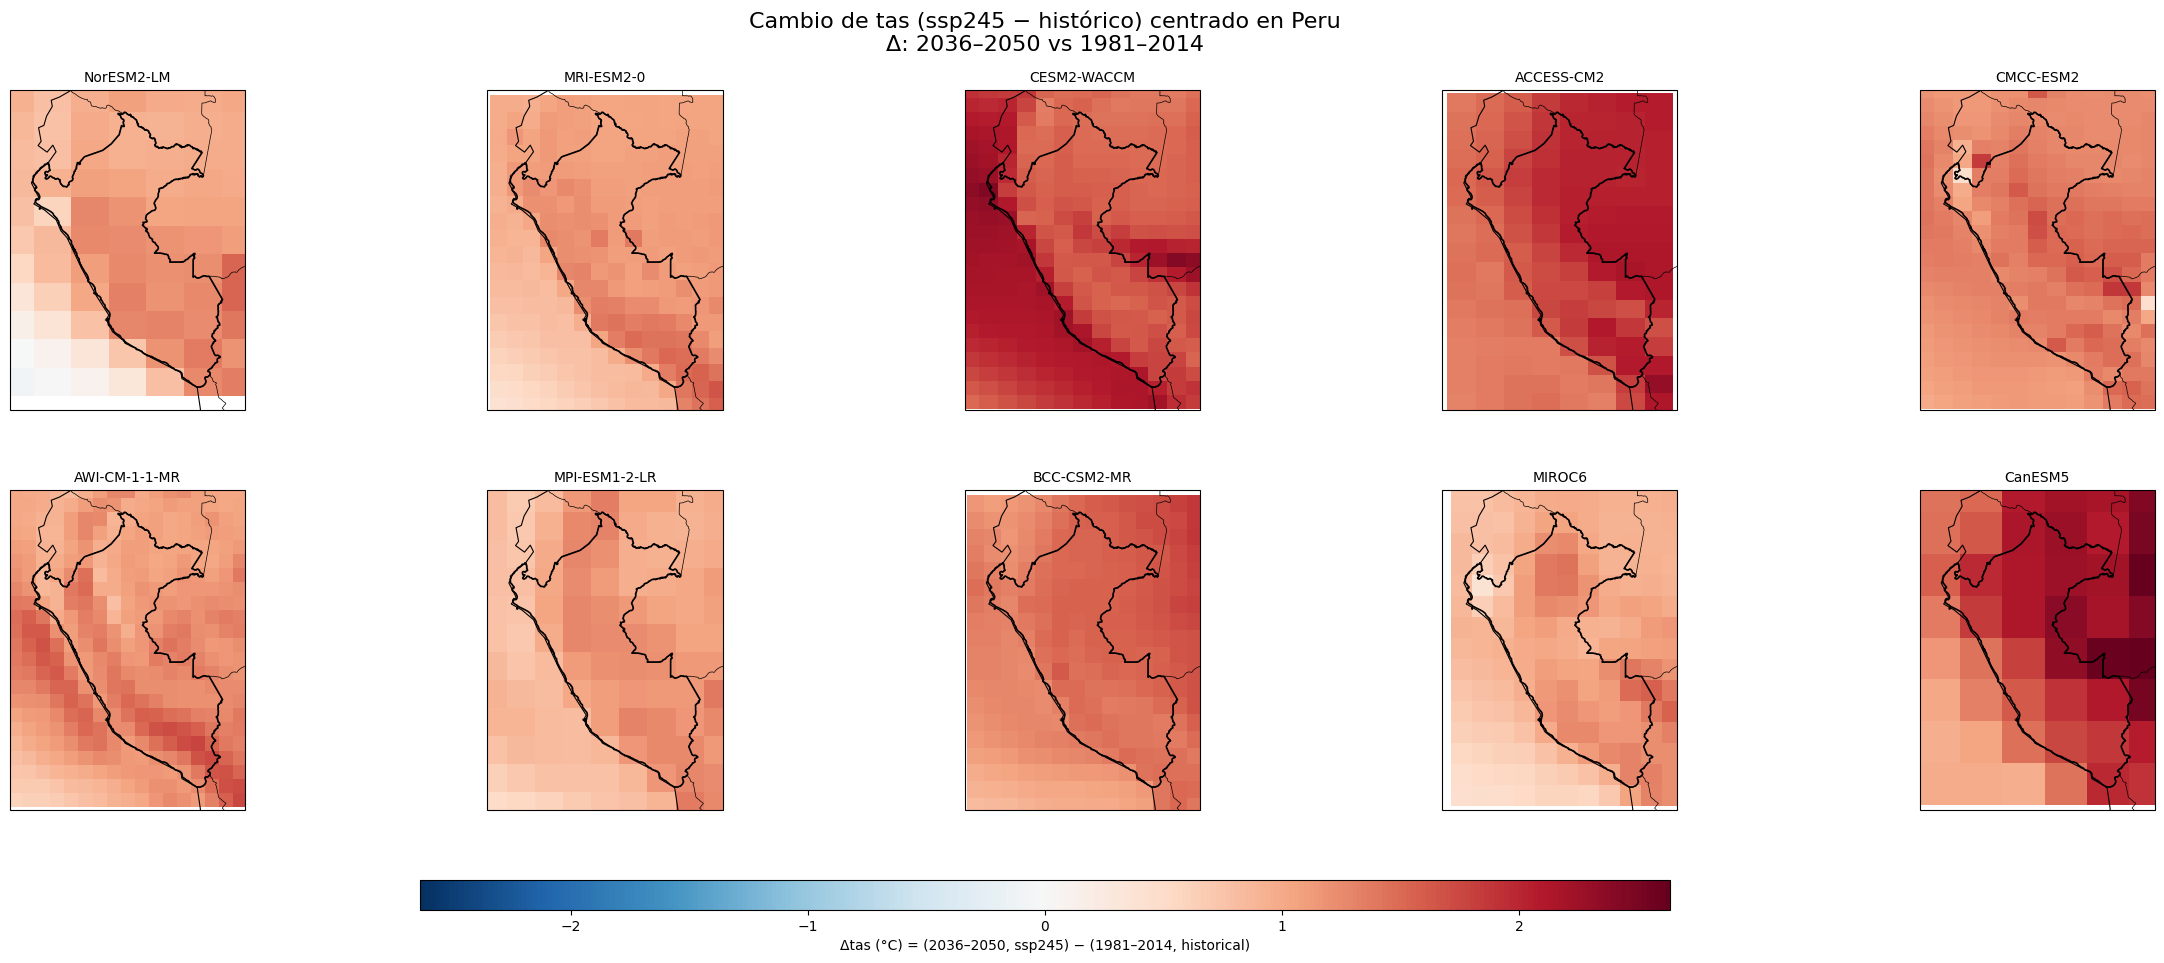

In [67]:
# PLOT 2×5 centrado en el país
# =========================================================
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
axes = axes.flatten()

im = None
for ax, m in zip(axes, models):

    ax.set_extent(extent, crs=proj)

    delta = delta_maps.get(m)
    if delta is None:
        ax.set_title(f"{m}\n(sin datos)", fontsize=10)
        ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                          edgecolor="black", linewidth=1.2, zorder=3)
        ax.coastlines(resolution="110m", linewidth=0.8)
        continue

    im = ax.pcolormesh(
        delta["lon"], delta["lat"], delta,
        shading="auto", cmap="RdBu_r",
        vmin=-max_abs, vmax=max_abs,
        transform=proj
    )

    ax.coastlines(resolution="110m", linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                      edgecolor="black", linewidth=1.2, zorder=3)

    ax.set_title(m, fontsize=10)

fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Δtas (°C) = (2036–2050, ssp245) − (1981–2014, historical)")

fig.suptitle(
    f"Cambio de tas (ssp245 − histórico) centrado en {country}\nΔ: 2036–2050 vs 1981–2014",
    fontsize=16
)

out = f"delta_tas_{country}_ssp245_2036_2050_minus_hist_1981_2014.png"
fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

plt.show()

## PRECIPITACION ##

In [87]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat6 = cat.search(
    variable_id = 'pr',        # precipitacion  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'ssp585',  # simulación ssp585
    source_id = ['MPI-ESM1-2-HR','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_ssp585_pr = cat6.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects inste

In [89]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat7 = cat.search(
    variable_id = 'pr',        # precipitacion  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'ssp245',  # simulación ssp585
    source_id = ['MPI-ESM1-2-HR','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_ssp245_pr = cat7.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [92]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat8 = cat.search(
    variable_id = 'pr',        # precipitacion  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'historical',  
    source_id = ['MPI-ESM1-2-HR','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_historical_pr = cat8.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [93]:
import numpy as np

def time_range_str(t):
    # t es ds['time']
    t0 = t.isel(time=0).values
    t1 = t.isel(time=-1).values
    n  = t.size
    return t0, t1, n

print("Modelos y cobertura temporal (ssp585):\n")

for key, ds in ds_dict_full_historical_pr.items():
    src = ds.attrs.get("source_id", key.split(".")[2] if isinstance(key, str) and "." in key else str(key))

    if "time" not in ds.coords:
        print(f"{src}: SIN coord time")
        continue

    t = ds["time"]
    t0, t1, n = time_range_str(t)

    # paso temporal aproximado (en días), si existe
    dt = None
    if n >= 2:
        try:
            dt = (t.isel(time=1).values - t.isel(time=0).values) / np.timedelta64(1, "D")
        except Exception:
            dt = None

    if dt is None:
        print(f"{src}: {t0}  ->  {t1}   (n={n})")
    else:
        print(f"{src}: {t0}  ->  {t1}   (n={n}, dt≈{dt:.3g} días)")

Modelos y cobertura temporal (ssp585):

MIROC6: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
BCC-CSM2-MR: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
CESM2-WACCM: 1850-01-15 12:00:00  ->  2014-12-15 12:00:00   (n=1980, dt≈29.5 días)
ACCESS-CM2: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
MPI-ESM1-2-LR: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
CMCC-ESM2: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
MPI-ESM1-2-HR: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
CanESM5: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
MRI-ESM2-0: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
AWI-CM-1-1-MR: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)


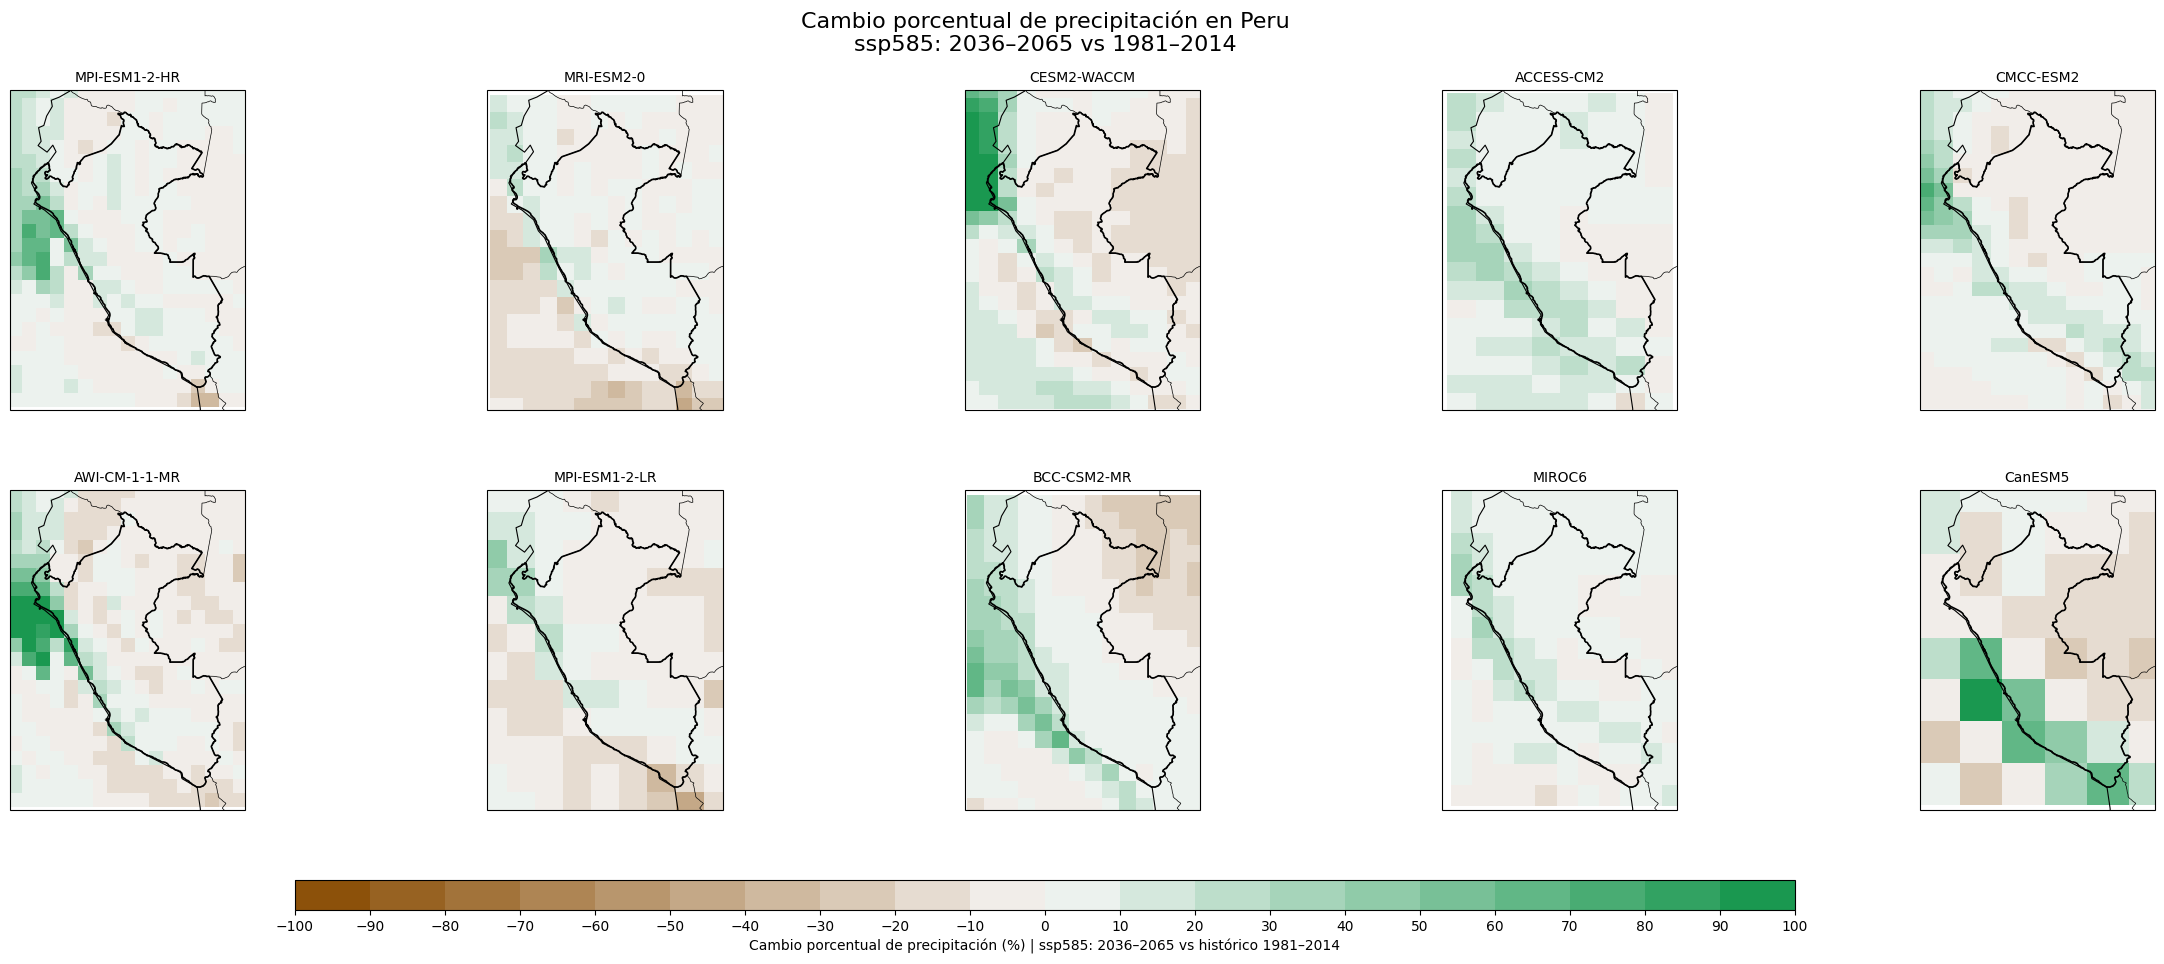

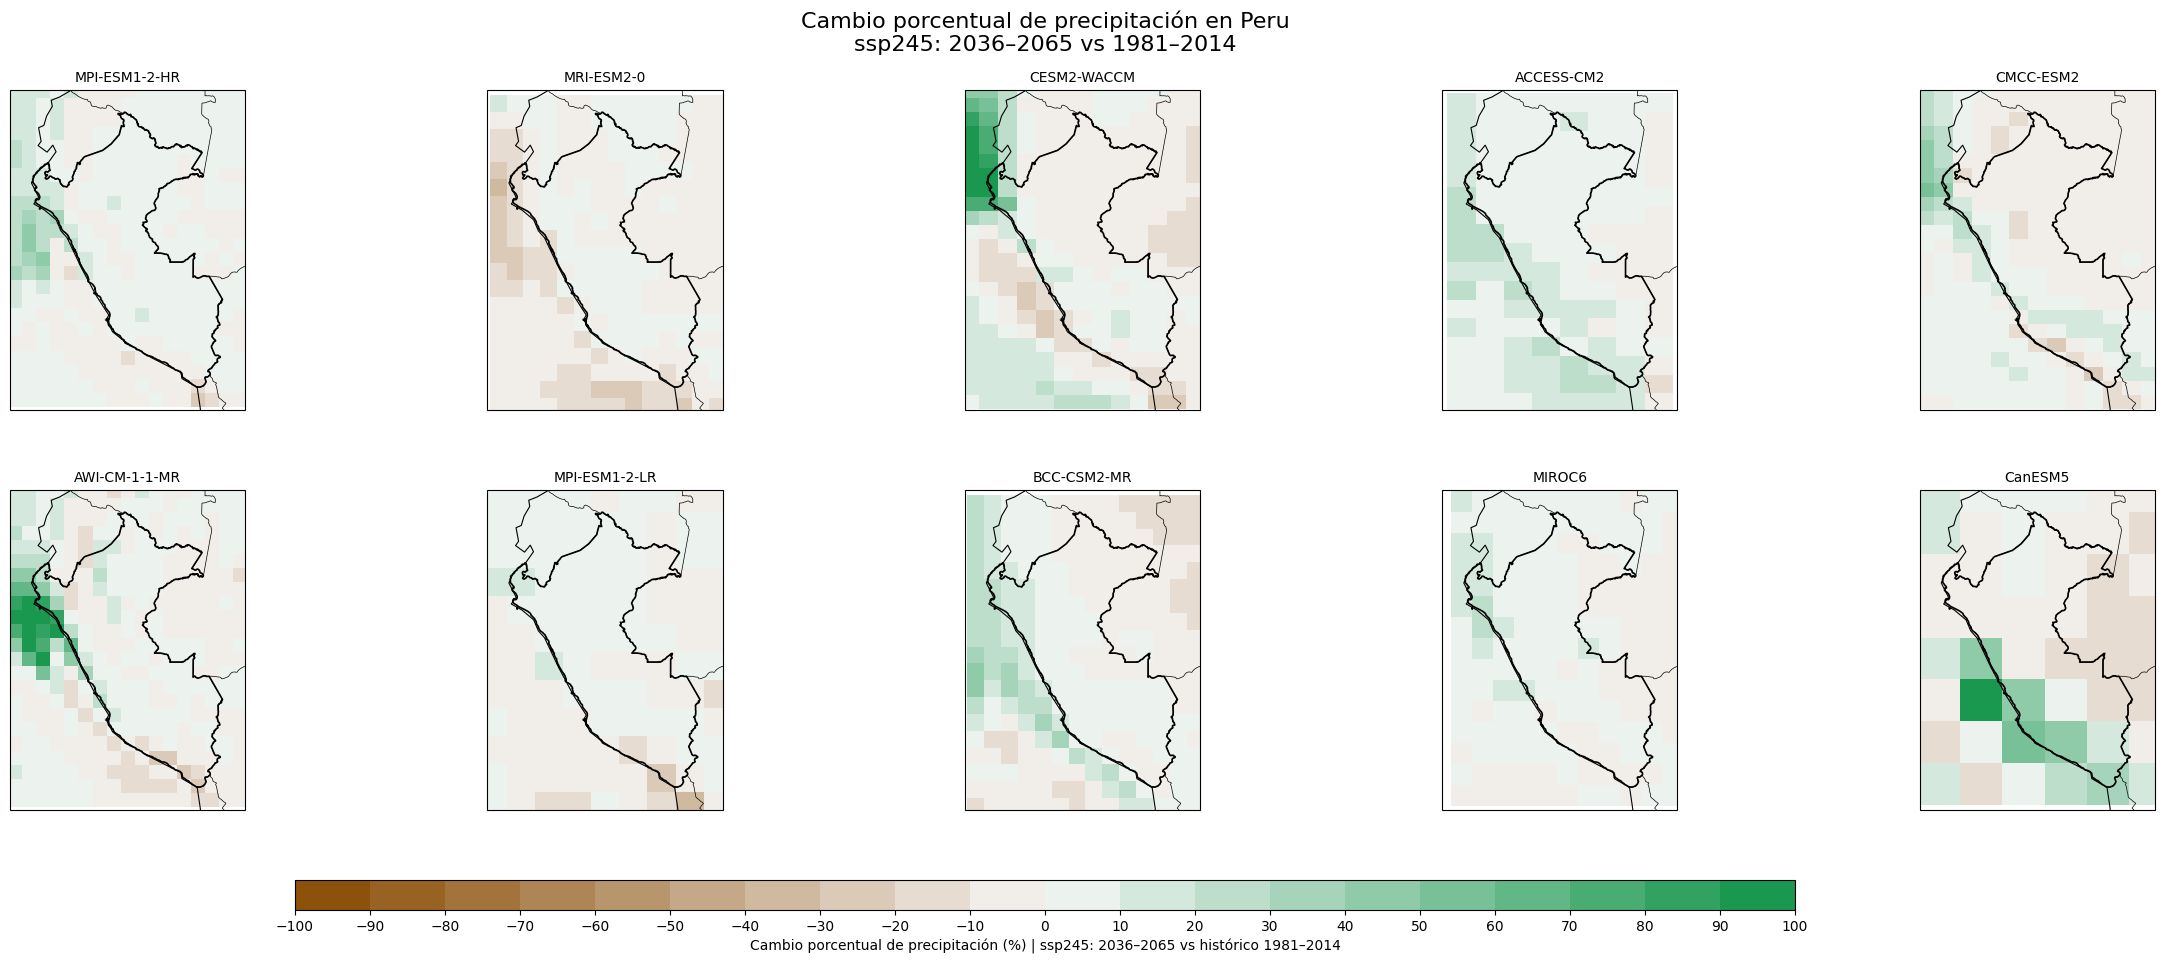

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

# =========================================================
# AJUSTA AQUÍ
# =========================================================
country = "Peru"
pad_deg = 1.5

models = ['MPI-ESM1-2-HR','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
          'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5']

t0_hist, t1_hist = "1981-01-01", "2014-12-31"
t0_fut,  t1_fut  = "2036-01-01", "2065-12-31"

proj = ccrs.PlateCarree()

# =========================================================
# ESCALA %: -100 a 100 cada 10, marrón->blanco->verde
# =========================================================
levels = np.arange(-100, 110, 10)  # -100, -90, ..., 100
cmap = LinearSegmentedColormap.from_list(
    "brown_white_green",
    ["#8c510a", "#f7f7f7", "#1a9850"]  # marrón, blanco, verde
)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# =========================================================
# UTILIDADES
# =========================================================
def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

def to_model_dict(ds_dict):
    out = {}
    for _, ds in ds_dict.items():
        m = ds.attrs.get("source_id", None)
        if m is not None:
            out[m] = ds
    return out

def sel_time_safe(da, t0, t1):
    da = da.sortby("time")
    try:
        return da.sel(time=slice(t0, t1))
    except Exception:
        y0, y1 = int(t0[:4]), int(t1[:4])
        return da.where((da["time"].dt.year >= y0) & (da["time"].dt.year <= y1), drop=True)

def mean_pr_period(ds, t0, t1, extent):
    """
    Datos mensuales (Amon). pr suele venir en kg m-2 s-1.
    Para % no hace falta convertir, pero lo dejo en mm/día por claridad.
    """
    pr = ds["pr"].squeeze()

    if "time" in pr.dims:
        pr = sel_time_safe(pr, t0, t1)
        if pr.sizes.get("time", 0) == 0:
            return None

    # 0–360 -> -180–180
    if pr.lon.max() > 180:
        pr = pr.assign_coords(lon=((pr.lon + 180) % 360) - 180).sortby("lon")

    lon_min, lon_max, lat_min, lat_max = extent
    pr = pr.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    if pr.lon.size == 0 or pr.lat.size == 0:
        return None

    # promedio multi-anual (mensual en origen, pero aquí promedio total del periodo)
    pr_mean = pr.mean("time", skipna=True)

    # opcional: convertir a mm/día (kg m-2 s-1 == mm/s)
    pr_mean = pr_mean * 86400.0

    return pr_mean

def pct_change(fut, hist, eps=1e-6):
    pct = 100.0 * (fut - hist) / hist.where(np.abs(hist) > eps)
    return pct.clip(min=-100, max=100)

# =========================================================
# EXTENT PERÚ
# =========================================================
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")

# =========================================================
# DICCIONARIOS POR MODELO (asume que ya existen):
# ds_dict_full_historical_pr, ds_dict_full_ssp585_pr, ds_dict_full_ssp245_pr
# =========================================================
hist_by_model  = to_model_dict(ds_dict_full_historical_pr)
ssp585_by_model = to_model_dict(ds_dict_full_ssp585_pr)
ssp245_by_model = to_model_dict(ds_dict_full_ssp245_pr)

# =========================================================
# FUNCIÓN PARA CALCULAR + PLOTEAR % CAMBIO
# =========================================================
def plot_pct_change(fut_by_model, scenario_name):

    pct_maps = {}
    for m in models:
        ds_h = hist_by_model.get(m)
        ds_f = fut_by_model.get(m)

        if (ds_h is None) or (ds_f is None):
            pct_maps[m] = None
            continue

        hist = mean_pr_period(ds_h, t0_hist, t1_hist, extent)
        fut  = mean_pr_period(ds_f, t0_fut,  t1_fut,  extent)

        if (hist is None) or (fut is None):
            pct_maps[m] = None
            continue

        pct_maps[m] = pct_change(fut, hist)

    # ---- plot 2x5
    fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
    axes = axes.flatten()

    im = None
    for ax, m in zip(axes, models):

        ax.set_extent(extent, crs=proj)

        da = pct_maps.get(m)
        if da is None:
            ax.set_title(f"{m}\n(sin datos)", fontsize=10)
            ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                              edgecolor="black", linewidth=1.2, zorder=3)
            ax.coastlines(resolution="110m", linewidth=0.8)
            continue

        im = ax.pcolormesh(
            da["lon"], da["lat"], da,
            shading="auto",
            cmap=cmap, norm=norm,
            transform=proj
        )

        ax.coastlines(resolution="110m", linewidth=0.8)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                          edgecolor="black", linewidth=1.2, zorder=3)
        ax.set_title(m, fontsize=10)

    fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

    cax = fig.add_axes([0.20, 0.08, 0.60, 0.03])
    cbar = fig.colorbar(im, cax=cax, orientation="horizontal", ticks=levels)
    cbar.ax.xaxis.set_major_locator(mticker.FixedLocator(levels))
    cbar.set_label(f"Cambio porcentual de precipitación (%) | {scenario_name}: {t0_fut[:4]}–{t1_fut[:4]} vs histórico {t0_hist[:4]}–{t1_hist[:4]}")

    fig.suptitle(
        f"Cambio porcentual de precipitación en {country}\n{scenario_name}: {t0_fut[:4]}–{t1_fut[:4]} vs {t0_hist[:4]}–{t1_hist[:4]}",
        fontsize=16
    )

    out = f"pct_change_pr_{country}_{scenario_name}_{t0_fut[:4]}_{t1_fut[:4]}_vs_{t0_hist[:4]}_{t1_hist[:4]}_-100_100.png"
    fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")
    plt.show()

# =========================================================
# EJECUTAR
# =========================================================
plot_pct_change(ssp585_by_model, "ssp585")
plot_pct_change(ssp245_by_model, "ssp245")


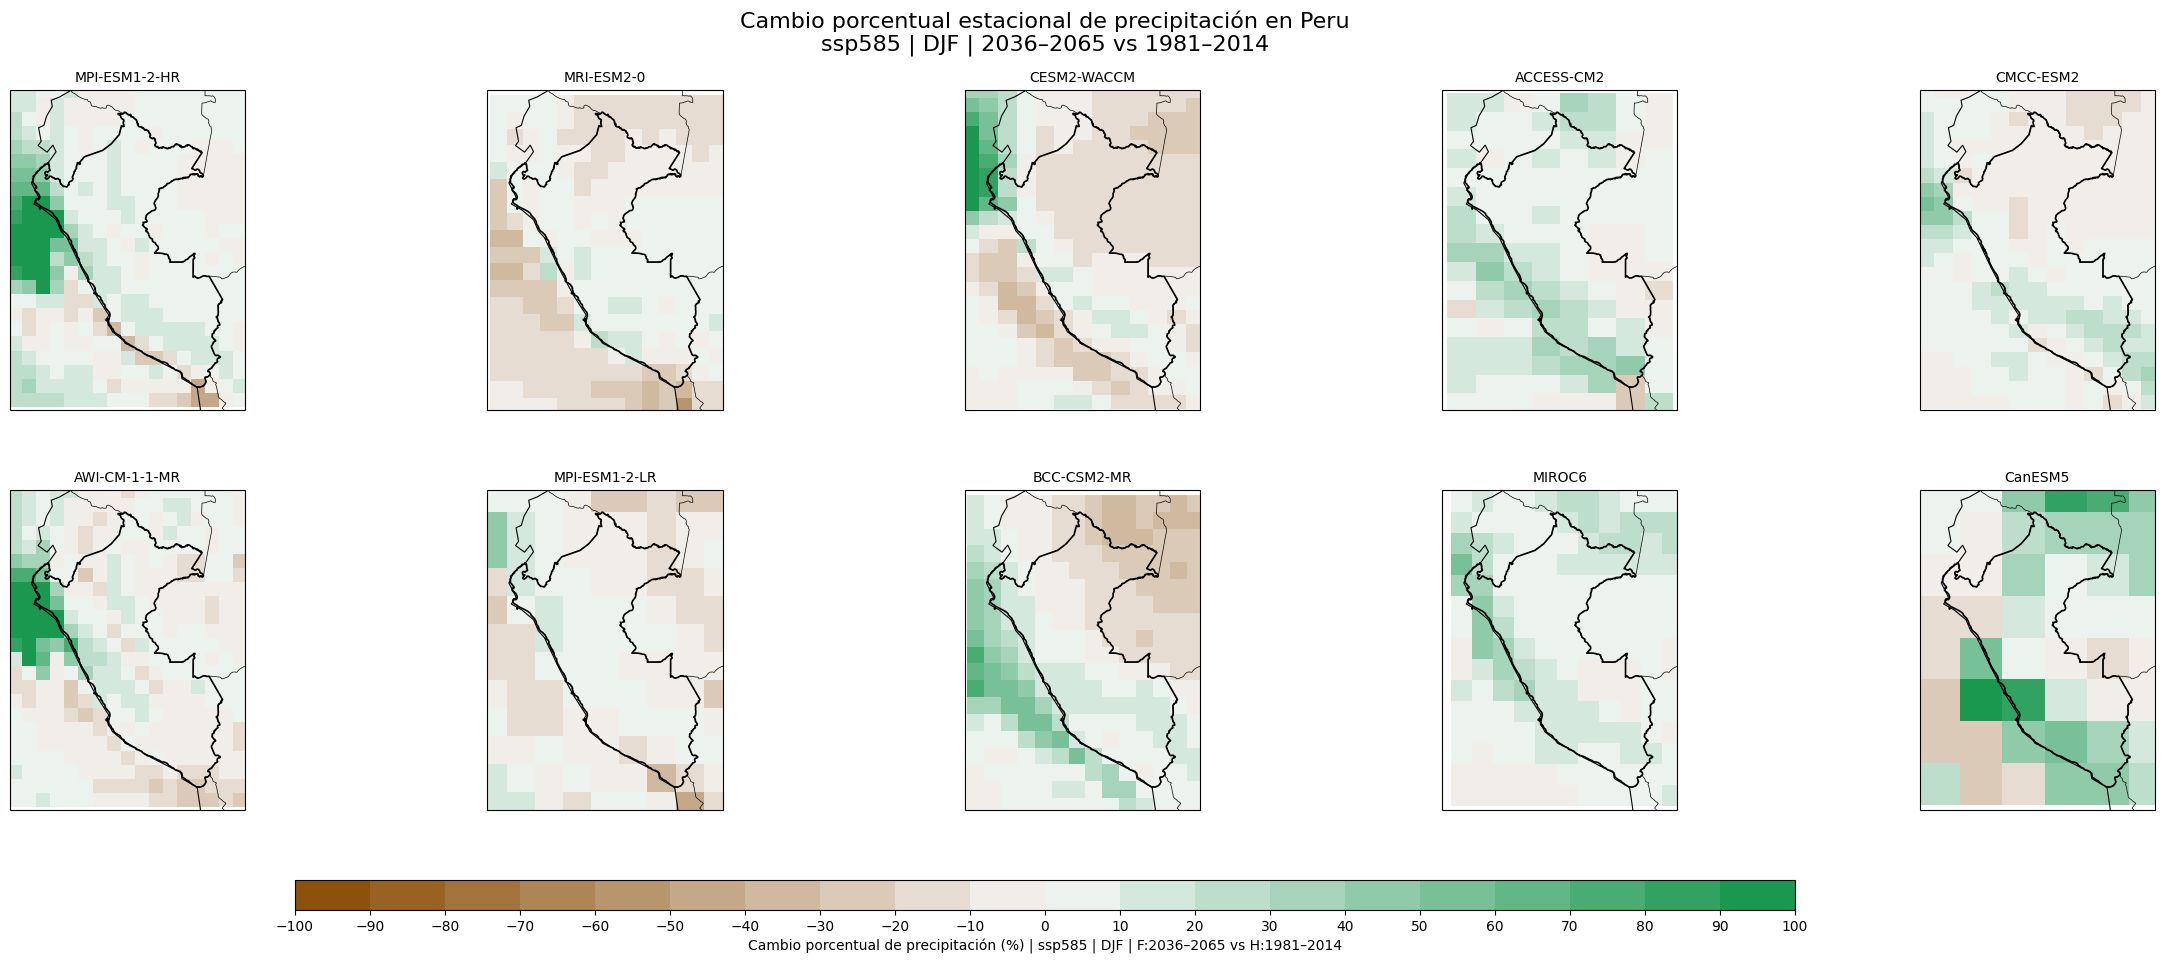

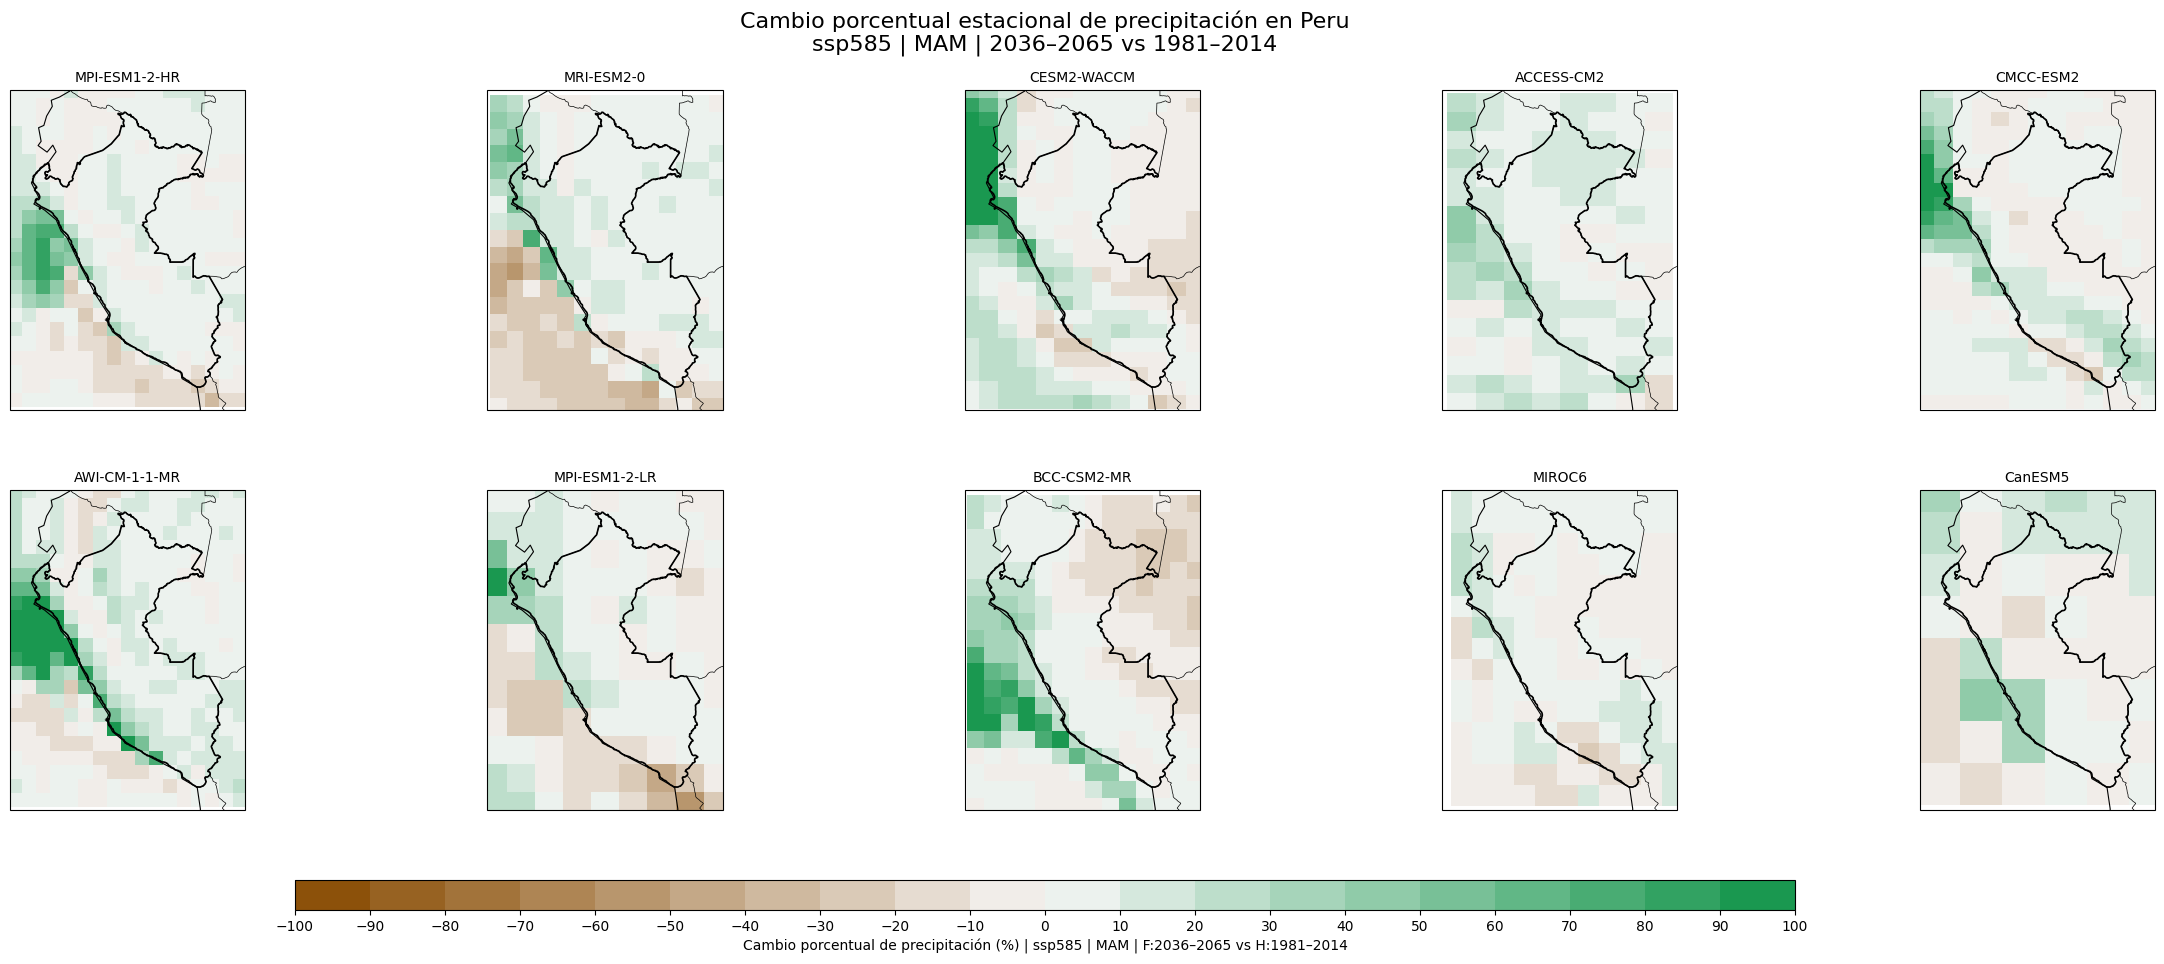

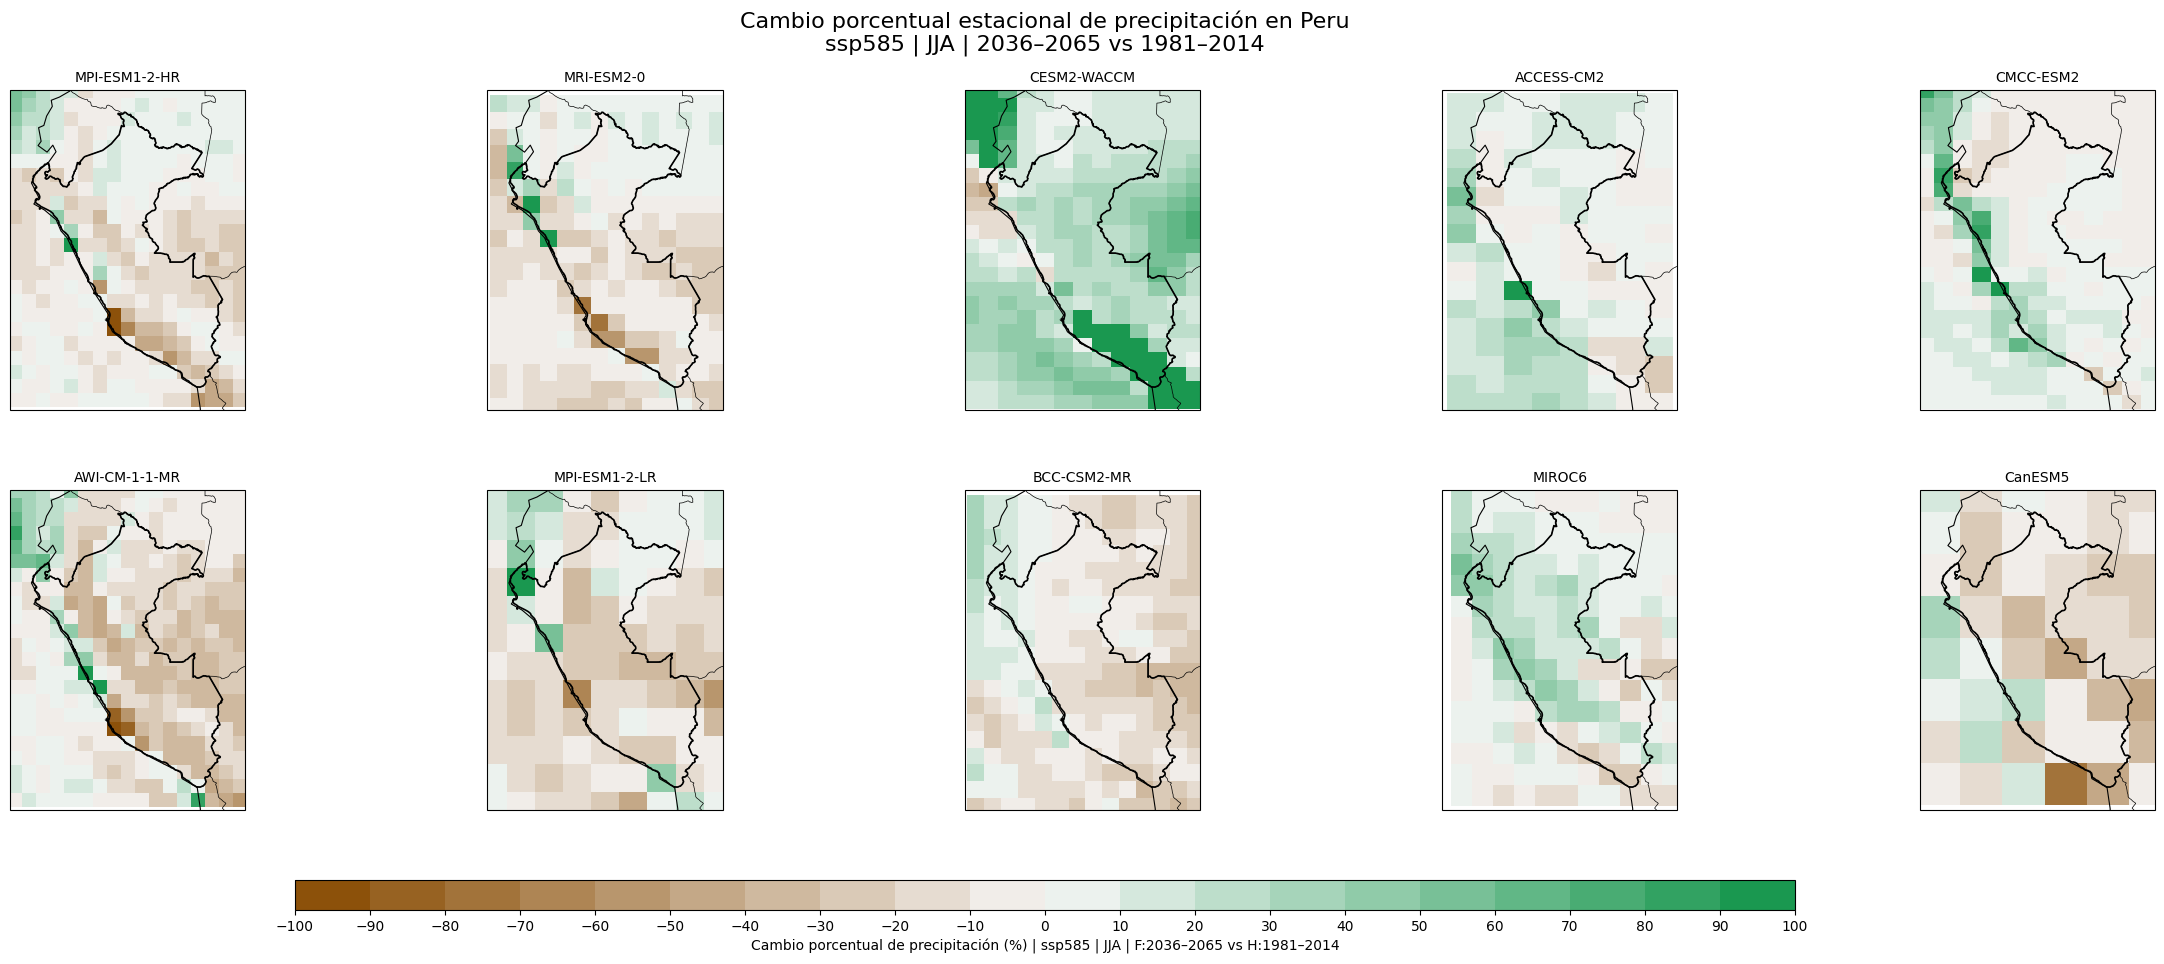

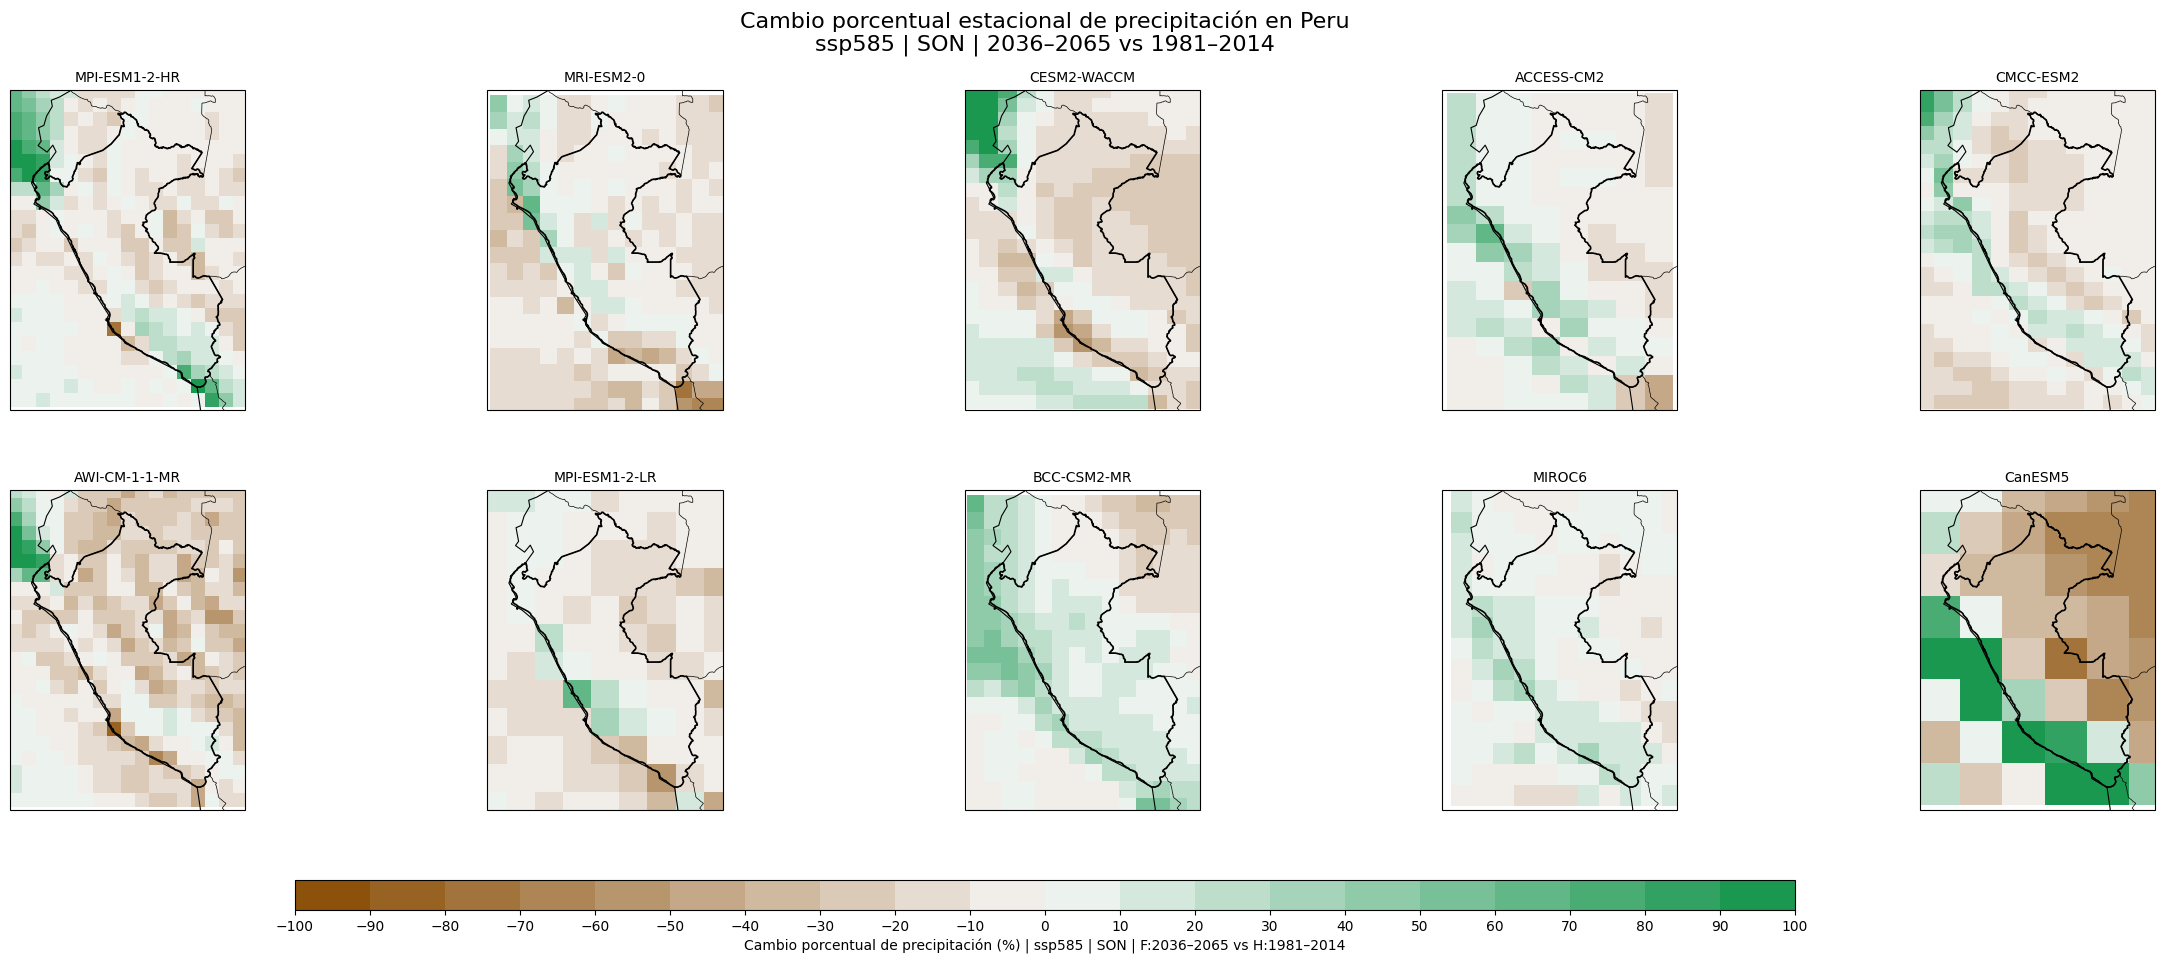

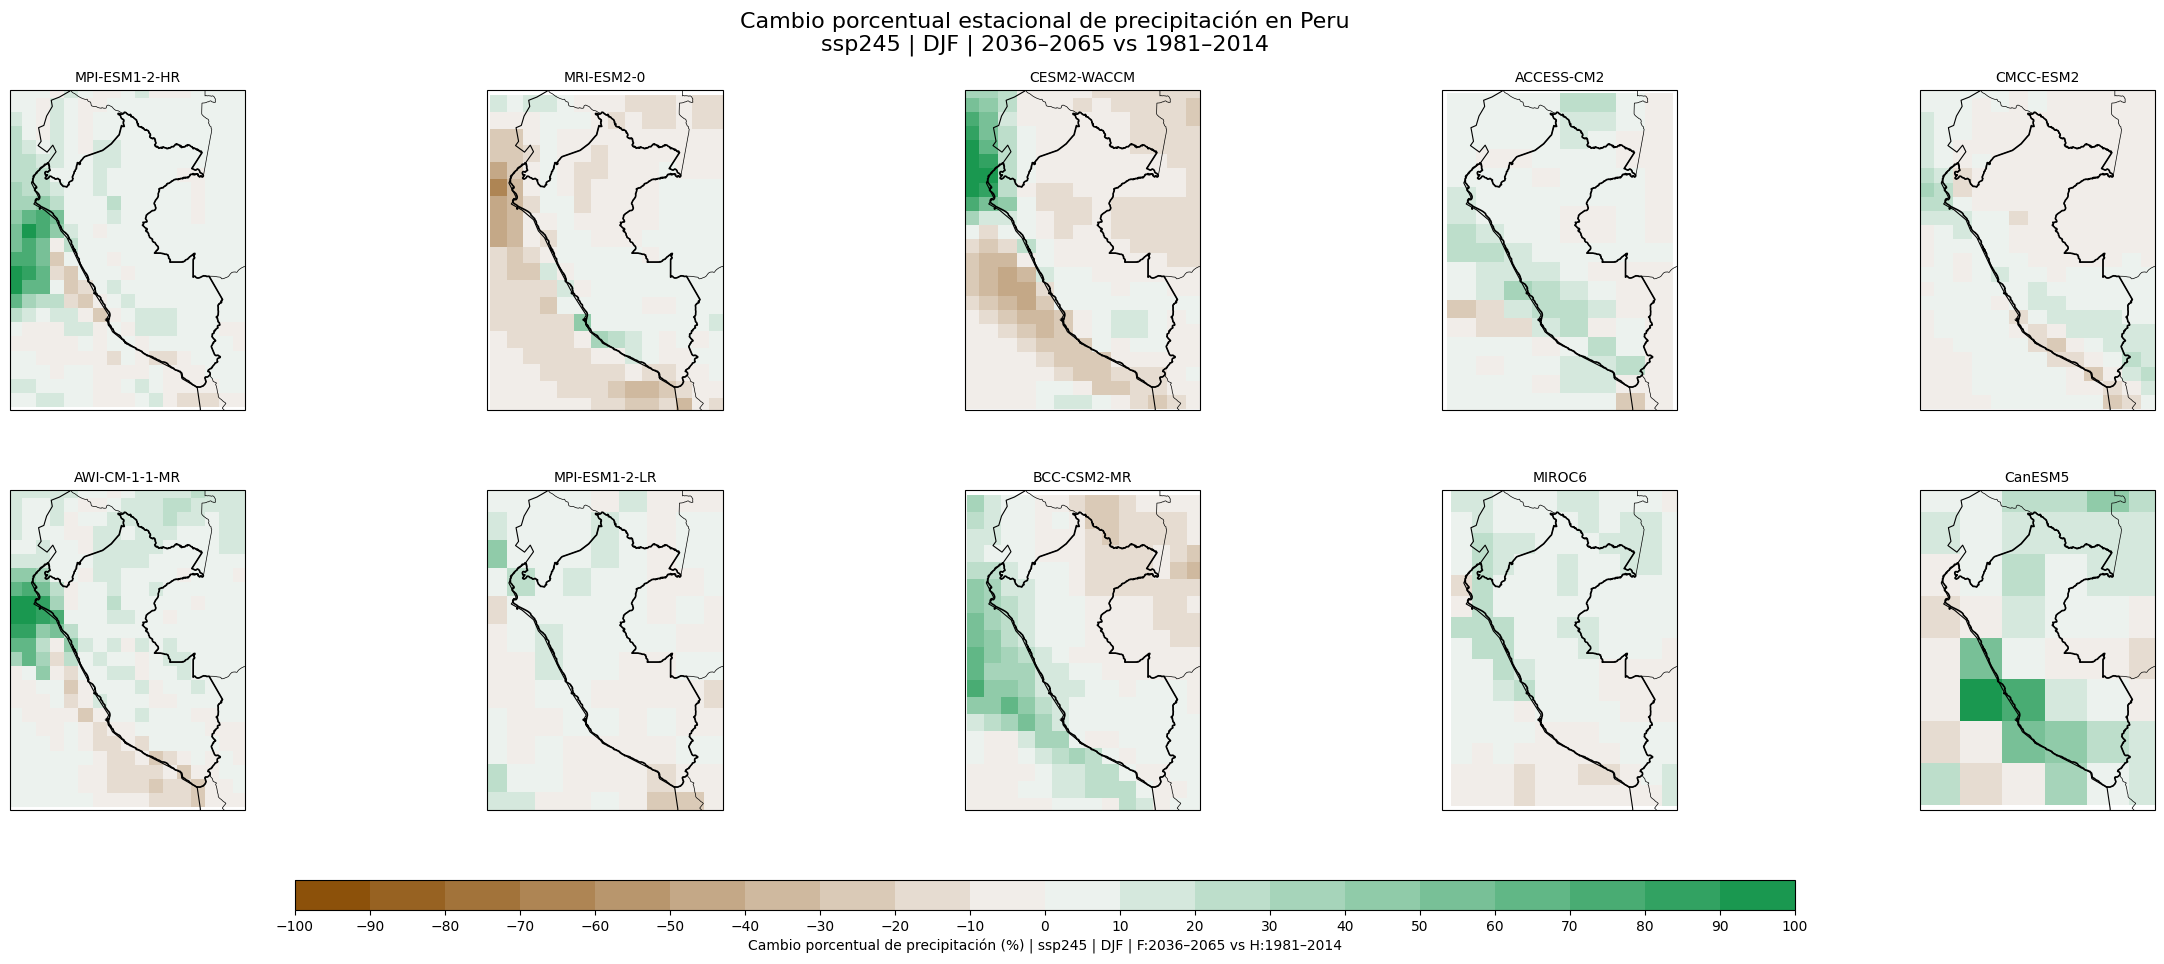

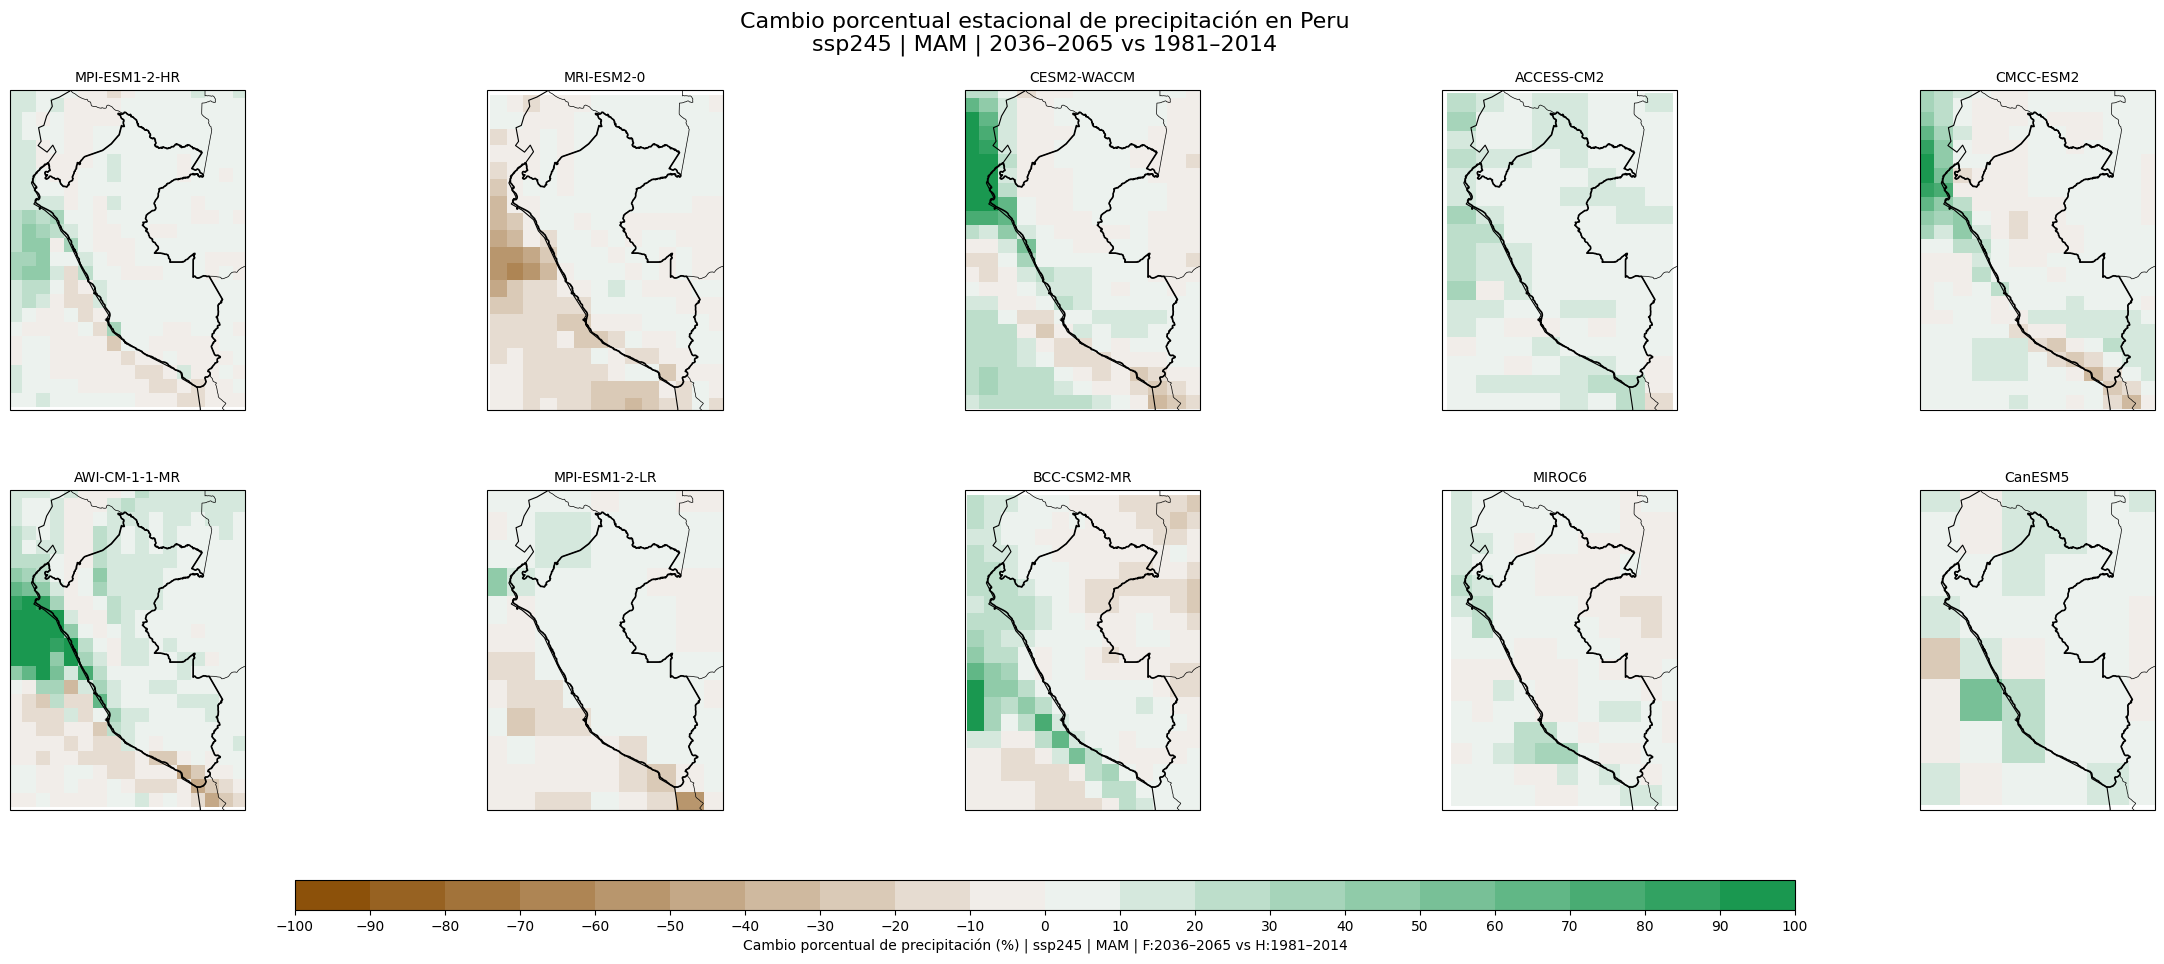

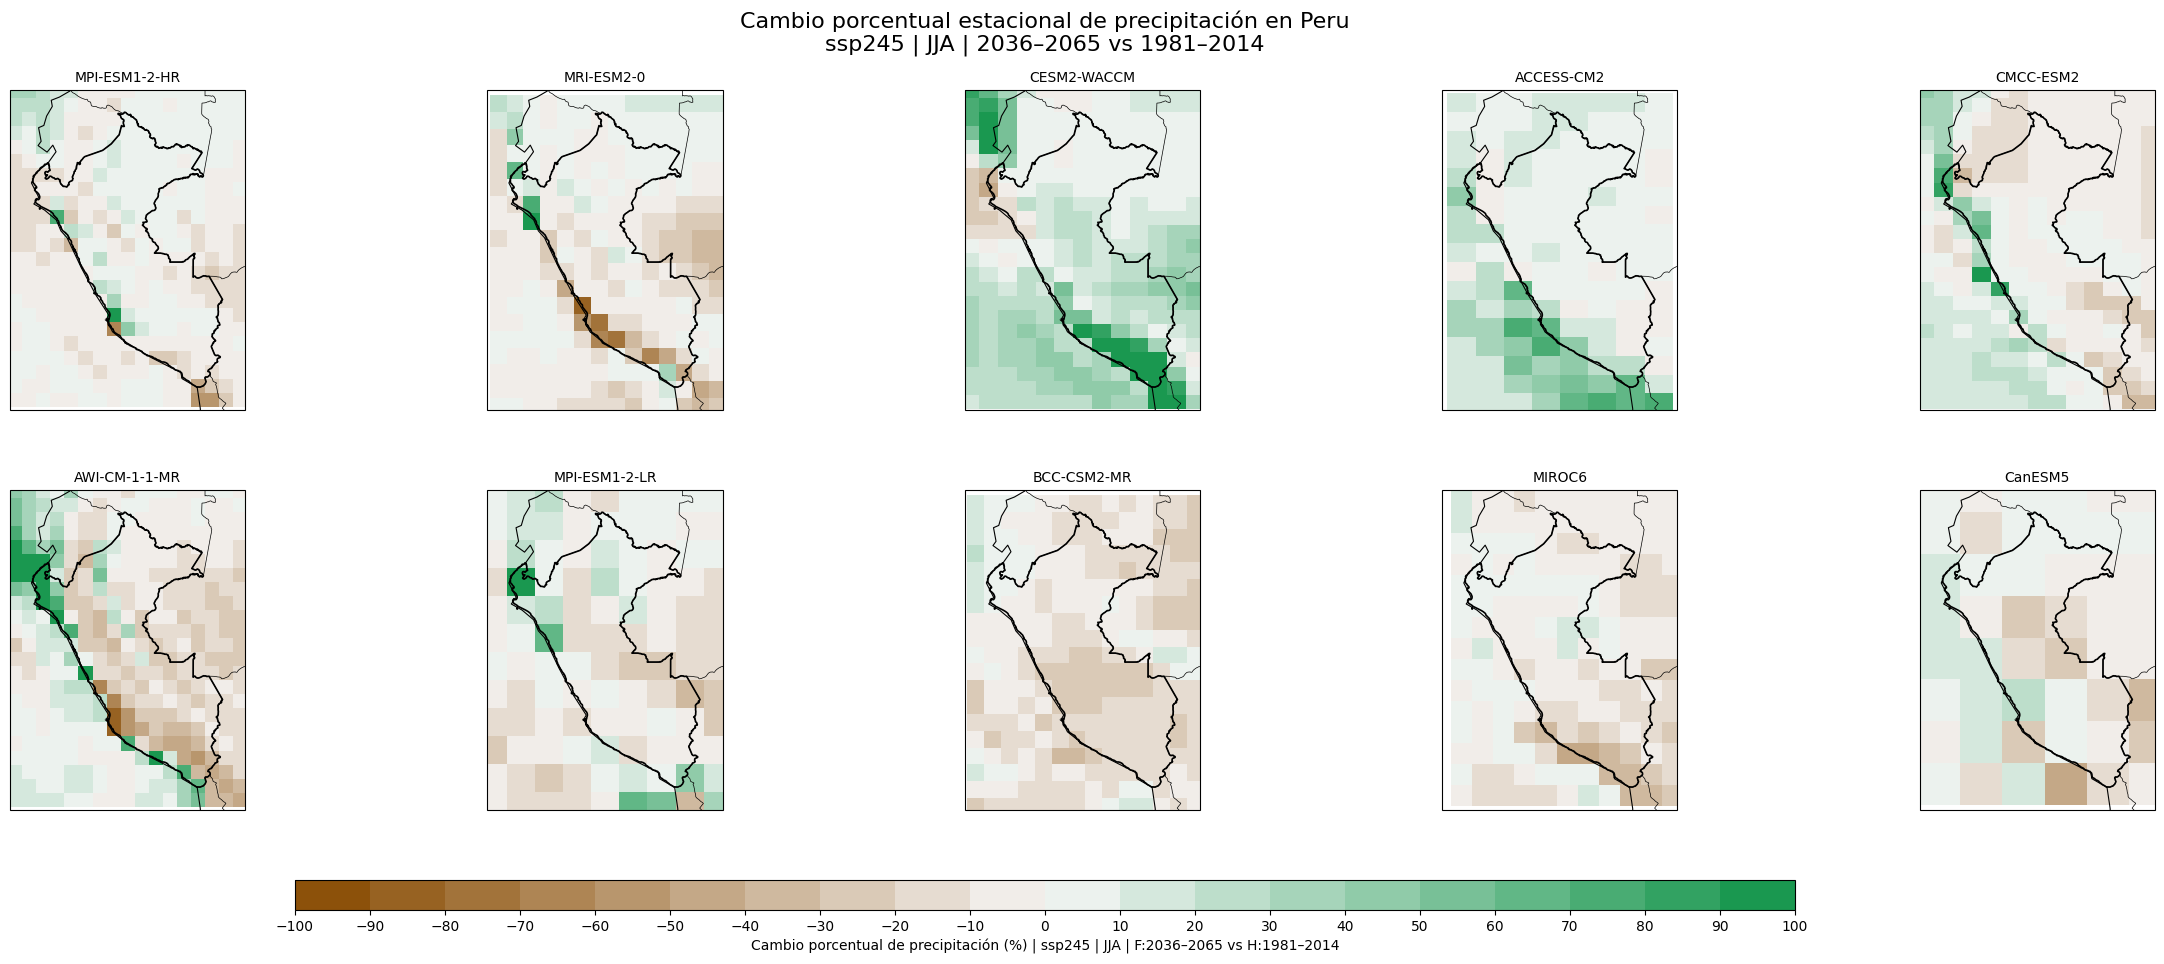

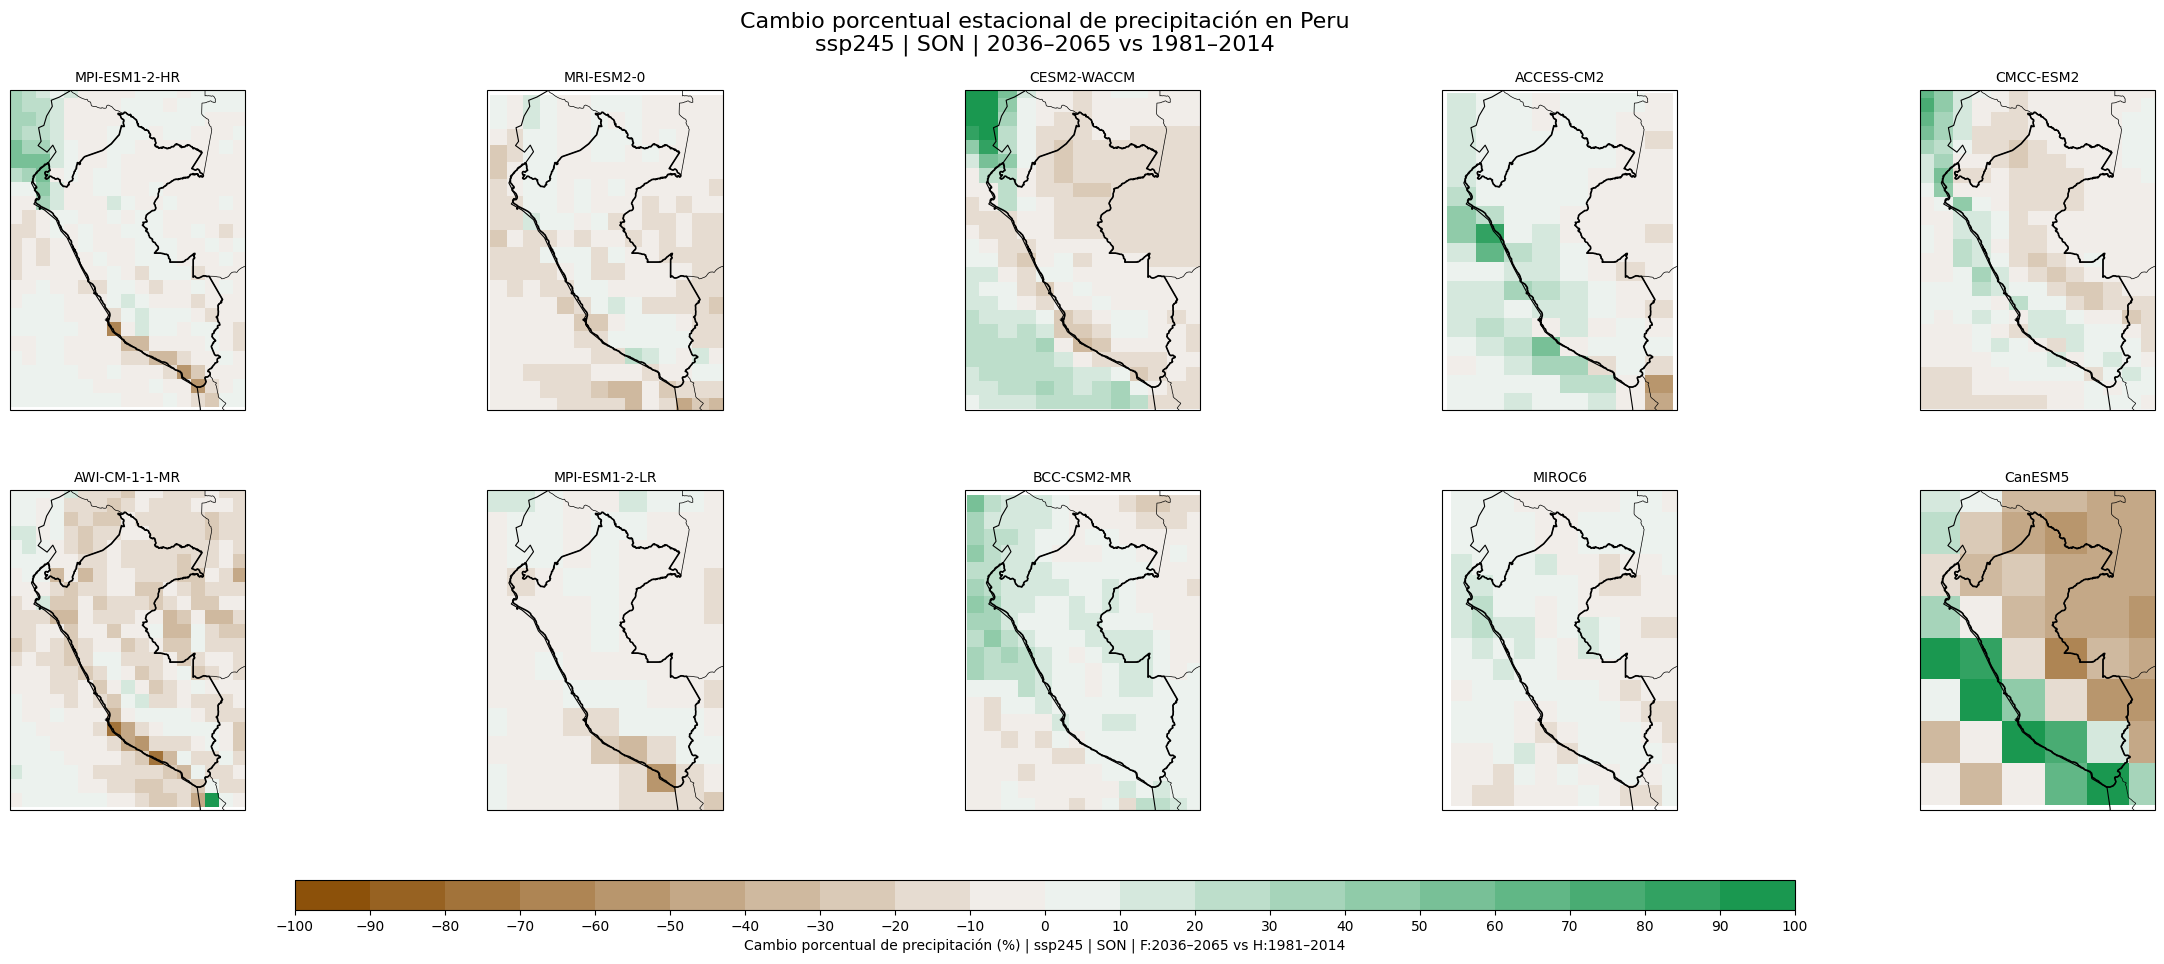

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

# =========================================================
# AJUSTA AQUÍ
# =========================================================
country = "Peru"
pad_deg = 1.5

models = ['MPI-ESM1-2-HR','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
          'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5']

t0_hist, t1_hist = "1981-01-01", "2014-12-31"
t0_fut,  t1_fut  = "2036-01-01", "2065-12-31"

proj = ccrs.PlateCarree()

# %: -100 a 100 cada 10, marrón->blanco->verde
levels = np.arange(-100, 110, 10)
cmap = LinearSegmentedColormap.from_list(
    "brown_white_green",
    ["#8c510a", "#f7f7f7", "#1a9850"]
)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# =========================================================
# UTILIDADES
# =========================================================
def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(resolution=resolution, category="cultural", name="admin_0_countries")
    geoms = [r.geometry for r in shapereader.Reader(shp).records() if r.attributes.get("ADMIN") == country_name]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)
    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

def to_model_dict(ds_dict):
    out = {}
    for _, ds in ds_dict.items():
        m = ds.attrs.get("source_id", None)
        if m is not None:
            out[m] = ds
    return out

def sel_time_safe(da, t0, t1):
    da = da.sortby("time")
    try:
        return da.sel(time=slice(t0, t1))
    except Exception:
        y0, y1 = int(t0[:4]), int(t1[:4])
        return da.where((da["time"].dt.year >= y0) & (da["time"].dt.year <= y1), drop=True)

def mean_pr_period_season(ds, t0, t1, extent, season):
    """
    Climatología estacional del periodo (Amon mensual):
    promedio de todos los meses pertenecientes a la estación.
    Retorna mm/día (solo para interpretación; para % no es obligatorio).
    """
    pr = ds["pr"].squeeze()

    if "time" in pr.dims:
        pr = sel_time_safe(pr, t0, t1)
        if pr.sizes.get("time", 0) == 0:
            return None

    # 0–360 -> -180–180
    if pr.lon.max() > 180:
        pr = pr.assign_coords(lon=((pr.lon + 180) % 360) - 180).sortby("lon")

    lon_min, lon_max, lat_min, lat_max = extent
    pr = pr.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    if pr.lon.size == 0 or pr.lat.size == 0:
        return None

    pr_seas = pr.groupby("time.season").mean("time", skipna=True).sel(season=season)

    # kg m-2 s-1 -> mm/día
    pr_seas = pr_seas * 86400.0
    return pr_seas

def pct_change(fut, hist, eps=1e-6):
    pct = 100.0 * (fut - hist) / hist.where(np.abs(hist) > eps)
    return pct.clip(min=-100, max=100)

# =========================================================
# EXTENT PERÚ
# =========================================================
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")

# =========================================================
# DICCIONARIOS POR MODELO (asume que ya existen):
# ds_dict_full_historical_pr, ds_dict_full_ssp585_pr, ds_dict_full_ssp245_pr
# =========================================================
hist_by_model   = to_model_dict(ds_dict_full_historical_pr)
ssp585_by_model = to_model_dict(ds_dict_full_ssp585_pr)
ssp245_by_model = to_model_dict(ds_dict_full_ssp245_pr)

# =========================================================
# PLOTEO ESTACIONAL POR ESCENARIO
# =========================================================
def plot_pct_change_seasonal(fut_by_model, scenario_name):
    seasons = ["DJF", "MAM", "JJA", "SON"]

    for season in seasons:

        pct_maps = {}
        for m in models:
            ds_h = hist_by_model.get(m)
            ds_f = fut_by_model.get(m)

            if (ds_h is None) or (ds_f is None):
                pct_maps[m] = None
                continue

            hist = mean_pr_period_season(ds_h, t0_hist, t1_hist, extent, season)
            fut  = mean_pr_period_season(ds_f, t0_fut,  t1_fut,  extent, season)

            if (hist is None) or (fut is None):
                pct_maps[m] = None
                continue

            pct_maps[m] = pct_change(fut, hist)

        # --- plot 2x5
        fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
        axes = axes.flatten()

        im = None
        for ax, m in zip(axes, models):

            ax.set_extent(extent, crs=proj)

            da = pct_maps.get(m)
            if da is None:
                ax.set_title(f"{m}\n(sin datos)", fontsize=10)
                ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                                  edgecolor="black", linewidth=1.2, zorder=3)
                ax.coastlines(resolution="110m", linewidth=0.8)
                continue

            im = ax.pcolormesh(
                da["lon"], da["lat"], da,
                shading="auto",
                cmap=cmap, norm=norm,
                transform=proj
            )

            ax.coastlines(resolution="110m", linewidth=0.8)
            ax.add_feature(cfeature.BORDERS, linewidth=0.5)
            ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                              edgecolor="black", linewidth=1.2, zorder=3)
            ax.set_title(m, fontsize=10)

        fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

        cax = fig.add_axes([0.20, 0.08, 0.60, 0.03])
        cbar = fig.colorbar(im, cax=cax, orientation="horizontal", ticks=levels)
        cbar.ax.xaxis.set_major_locator(mticker.FixedLocator(levels))
        cbar.set_label(
            f"Cambio porcentual de precipitación (%) | {scenario_name} | {season} "
            f"| F:{t0_fut[:4]}–{t1_fut[:4]} vs H:{t0_hist[:4]}–{t1_hist[:4]}"
        )

        fig.suptitle(
            f"Cambio porcentual estacional de precipitación en {country}\n"
            f"{scenario_name} | {season} | {t0_fut[:4]}–{t1_fut[:4]} vs {t0_hist[:4]}–{t1_hist[:4]}",
            fontsize=16
        )

        out = f"pct_change_pr_{country}_{scenario_name}_{season}_{t0_fut[:4]}_{t1_fut[:4]}_vs_{t0_hist[:4]}_{t1_hist[:4]}_-100_100.png"
        fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")
        plt.show()

# =========================================================
# EJECUTAR
# =========================================================
plot_pct_change_seasonal(ssp585_by_model, "ssp585")
plot_pct_change_seasonal(ssp245_by_model, "ssp245")
